# mask_x8

In [2]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


src = '/media/ldy/7E1CA94545711AE6/OSCC/mask_x8/std_mask'
size_list = []

for s in os.listdir(src):
    img = Image.open(os.path.join(src, s))
    w, h = img.size
    size_list.append(math.sqrt(w*h))

/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (125499114 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (109099119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (115977342 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/PIL/Image.py:2735: DecompressionBombWarning: Image size (104849220 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/s

In [3]:
size_list

[6933.062815235414,
 7194.352646346994,
 8684.607072286,
 7123.89780948604,
 7806.073532833264,
 8164.248893805235,
 8018.586409087327,
 8899.098268925904,
 6331.93122198907,
 7124.184163818339,
 7530.90313309101,
 6673.35185645115,
 9188.498245088802,
 6369.86734555752,
 7712.308474121091,
 7298.3175458457545,
 6736.68709381696,
 7765.8015684152015,
 7678.224404118442,
 6181.2649999817995,
 7450.244358408656,
 5782.304039048794,
 8280.33091126194,
 9254.380044065621,
 6478.136383250973,
 6177.042658101043,
 7919.111061223981,
 7558.300205734091,
 7974.078003129892,
 7121.251715815135,
 7512.346637369711,
 5457.584813816456,
 5928.374566438933,
 4949.606853074292,
 8164.248893805235,
 4862.946020675122,
 6687.062583825576,
 5307.334924422991,
 6654.4156768269295,
 8787.653839336186,
 8788.9931163928,
 9377.361569226176,
 7496.371122083005,
 7545.629595997938,
 8070.5142339258655,
 5245.57241871657,
 6513.363416853078,
 5783.983056683344,
 6008.304419717762,
 7545.285680476253,
 8486.14

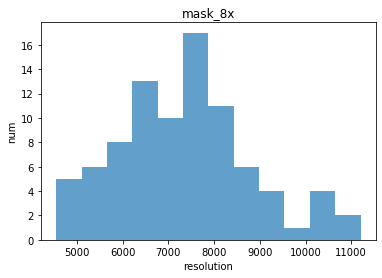

In [6]:
plt.hist(size_list, bins=12, alpha=0.7)
plt.xlabel('resolution')
plt.ylabel('num')
plt.title('mask_8x')
plt.show()

In [7]:
num = 0

for size in size_list:
    num += (size//512) ** 2

In [8]:
num

17491.0

# train & val split

In [10]:
import json
from random import shuffle


src = '/media/ldy/7E1CA94545711AE6/OSCC/mask_x8/std_mask'
save_dir = '/media/ldy/7E1CA94545711AE6/OSCC/meta/train_val.json'
content = dict()

slide_list = [c.split('.')[0] for c in os.listdir(src)]
shuffle(slide_list)
content['train'] = slide_list[:60]
content['val'] = slide_list[60:]

with open(save_dir, 'w') as f:
    json.dump(content, f)

# mean & std

In [1]:
import numpy as np
import cv2
import os
from tqdm import tqdm_notebook as tqdm

imgs_path = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_8x/train'
 
len_ = 0
mean_list = [0, 0, 0]
std_list = [0, 0, 0]
for slide in tqdm(os.listdir(imgs_path)):
    slide_dir = os.path.join(imgs_path, slide)
    for item in os.listdir(slide_dir):
        item_path = os.path.join(slide_dir, item)
        img = cv2.imread(item_path) / 255.0
        len_ += 1
    
        for i in range(3):
            mean_list[i] += img[:, :, i].mean()
            std_list[i] += img[:, :, i].std()
#         print(mean_list, std_list)
    


In [9]:
means = [c/len_ for c in mean_list]
stds =[c/len_ for c in std_list]

means.reverse()
stds.reverse()
 
print("normMean = {}".format(means))
print("normStd = {}".format(stds))

normMean = [0.7977030656012407, 0.6209725296368548, 0.8405069840436176]
normStd = [0.12547100153982244, 0.2282086633141772, 0.08945582263750403]


In [11]:
from PIL import Image

new = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_8x/train/_20190403080921/_20190403080921_1_12_1_.png'

img = np.array(Image.open(new)) / 255.0

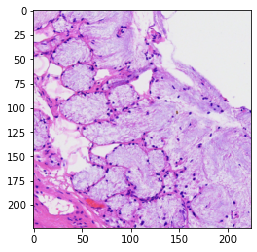

In [20]:
plt.imshow(img)
plt.show()

In [23]:
std_img = (img - np.array(means)) / np.array(stds)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


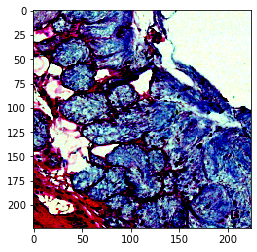

In [24]:
import matplotlib.pyplot as plt

r_img = np.array(std_img * 255, dtype='uint8') 

plt.imshow(std_img)
plt.show()

# train&val set meta file 

## train

In [87]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os


root = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/seg_5x/'
suffix = 'val_bd_512'

data_dir = root + suffix

train_list = []

for slide in tqdm(os.listdir(data_dir)):
    slide_dir = os.path.join(data_dir, slide)
    for patch in os.listdir(slide_dir):
        info = patch.split('_')
        ver = int(info[2])
        col = int(info[3])
#         target = int(info[4])
        
#         train_list.append({"image_id": patch, "slide_id": slide, "ver": ver, "col": col, "target": target})
        train_list.append({"image_id": patch, "slide_id": slide, "ver": ver, "col": col})

        

In [88]:
save_path = root + suffix + '.csv'

# df = pd.DataFrame(data=train_list, columns=['image_id', 'slide_id', 'ver', 'col', 'target'])
df = pd.DataFrame(data=train_list, columns=['image_id', 'slide_id', 'ver', 'col'])
df.to_csv(save_path)

In [47]:
target_list = [c['target'] for c in train_list]

In [48]:
hist = [0, 0, 0]
for c in target_list:
    hist[c-1] += 1

In [49]:
hist

[38271, 3424, 12614]

In [50]:
for c in hist:
    print(c/3424)

11.177278037383177
1.0
3.683995327102804


## val

In [56]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm


root = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_8x/val_512/'

val_list = []

for slide in tqdm(os.listdir(root)):
    slide_dir = os.path.join(root, slide)
    for patch in os.listdir(slide_dir):
        info = patch.split('_')
        ver = int(info[2])
        col = int(info[3])
        target = int(info[4])
        
        val_list.append({"image_id": patch, "slide_id": slide, "ver": ver, "col": col, "target": target})

        

In [57]:
save_dir = "/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_8x/val_512.csv"

ef = pd.DataFrame(data=val_list, columns=['image_id', 'slide_id', 'ver', 'col', 'target'])

In [58]:
ef.to_csv(save_dir)

In [46]:
ef.iloc[4]

image_id    _20190404173751_12_19_3_.png
slide_id                 _20190404173751
ver                                   12
col                                   19
target                                 3
Name: 4, dtype: object

## target_mask_slide cls

In [ ]:
import os
import json
import numpy as np
from PIL import Image



## resize 

In [122]:
import os
from PIL import Image

src = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/val_mask_vis_5x_224'
save_dir = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/val_mask_vis_5x_224_x16'

if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for slide in os.listdir(src):
    print(slide)
    img = Image.open(os.path.join(src, slide))
    w, h = img.size
    img = img.resize((w*16, h*16), resample=Image.BILINEAR)
    img.save(os.path.join(save_dir, slide))

_20190403101928_mask.png
_20190403115136_mask.png
_20190409144119_mask.png
_20190409183934_mask.png
_20190718200940_mask.png
_20190718212036_mask.png
_20190404140844_mask.png
_20190719181439_mask.png
_20190412091216_mask.png
_20190719181501_mask.png
_20190718200921_mask.png
_20190719181431_mask.png
_20190719183613_mask.png
_20190404173751_mask.png
_20190718213917_mask.png
_20190403094116_mask.png
_20190412130836_mask.png
_20190404134841_mask.png
_20190403094206_mask.png
_20190409135946_mask.png
_20190412091226_mask.png
_20190718213907_mask.png
_20190412130806_mask.png
_20190403083910_mask.png
_20190718203748_mask.png
_20190412144040_mask.png
_20190718213936_mask.png


## rgb to class

In [124]:
def RGB_mapping_to_class(label):
    h, w = label.shape[0], label.shape[1]
    classmap = np.zeros(shape=(h, w))

    indices = np.where(np.all(label == (255, 0, 0), axis=-1))
    classmap[indices[0].tolist(), indices[1].tolist()] = 1
    indices = np.where(np.all(label == (0, 255, 0), axis=-1))
    classmap[indices[0].tolist(), indices[1].tolist()] = 2
    indices = np.where(np.all(label == (0, 0, 255), axis=-1))
    classmap[indices[0].tolist(), indices[1].tolist()] = 3
    indices = np.where(np.all(label == (0, 0, 0), axis=-1))
    classmap[indices[0].tolist(), indices[1].tolist()] = 0

    return classmap

In [133]:
src = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/vis/val_mask_vis_5x_224_binary'
dst = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/slide/mask/val_mask_5x_224_binary'

if not os.path.exists(dst):
    os.makedirs(dst)

for slide in os.listdir(src):
    print(slide)
    img = np.array(Image.open(os.path.join(src, slide)))
    target = RGB_mapping_to_class(img)
    target = Image.fromarray(target).convert('I')
    target.save(os.path.join(dst, slide))

_20190403101928_mask.png
_20190403115136_mask.png
_20190409144119_mask.png
_20190409183934_mask.png
_20190718200940_mask.png
_20190718212036_mask.png
_20190404140844_mask.png
_20190719181439_mask.png
_20190412091216_mask.png
_20190719181501_mask.png
_20190718200921_mask.png
_20190719181431_mask.png
_20190719183613_mask.png
_20190404173751_mask.png
_20190718213917_mask.png
_20190403094116_mask.png
_20190412130836_mask.png
_20190404134841_mask.png
_20190403094206_mask.png
_20190409135946_mask.png
_20190412091226_mask.png
_20190718213907_mask.png
_20190412130806_mask.png
_20190403083910_mask.png
_20190718203748_mask.png
_20190412144040_mask.png
_20190718213936_mask.png


In [251]:
import os

src = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/seg_5x/train_224'
num = 0
for slide in os.listdir(src):
    slide_dir = os.path.join(src, slide)
    num += len(os.listdir(slide_dir))
print(num)

56772


In [265]:
from PIL import Image
import numpy as np

img_path = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/seg_5x/val_bd_mask_224/_20190403115136/_20190403115136_2_14_.png'

img = Image.open(img_path)
img = np.array(img, dtype='uint8')

In [266]:
img

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

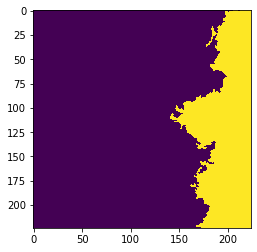

In [267]:
plt.imshow(img)
plt.show()

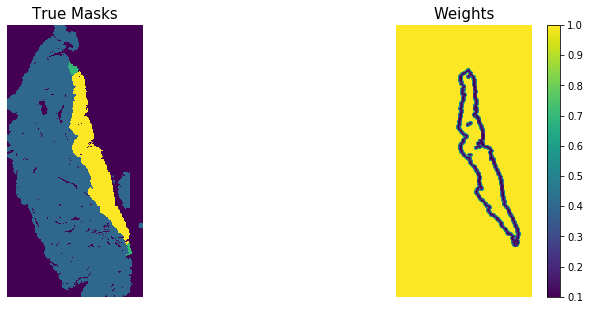

In [48]:
import numpy as np 
from skimage.segmentation import find_boundaries
from skimage import draw
import matplotlib.pyplot as plt
import cv2
from PIL import Image
w0 = 10
sigma = 20


def weightFunc(d, k, b):
    weight = min(d**2/k + b, 1)
    
    return weight

def make_weight_map(masks):
    """
    Generate the weight maps as specified in the UNet paper
    for a set of binary masks.
    
    Parameters
    ----------
    masks: array-like
        A 3D array of shape (n_masks, image_height, image_width),
        where each slice of the matrix along the 0th axis represents one binary mask.

    Returns
    -------
    array-like
        A 2D array of shape (image_height, image_width)
    
    """
    nrows, ncols = masks.shape
    mask_tumor = (masks == 3).astype(int)
#     mask_mucosa = (masks == 2).astype(int)
    distMap = np.zeros((nrows * ncols, 2))
    X1, Y1 = np.meshgrid(np.arange(nrows), np.arange(ncols))
    X1, Y1 = np.c_[X1.ravel(), Y1.ravel()].T
    for i, mask in enumerate([mask_tumor]):
        # find the boundary of each mask,
        # compute the distance of each pixel from this boundary
        bounds = find_boundaries(mask, mode='outer')
        X2, Y2 = np.nonzero(bounds)
        xSum = (X2.reshape(-1, 1) - X1.reshape(1, -1)) ** 2
        ySum = (Y2.reshape(-1, 1) - Y1.reshape(1, -1)) ** 2
        distMap[:, i] = np.sqrt(xSum + ySum).min(axis=0)
    ix = np.arange(distMap.shape[0])
    if distMap.shape[1] == 1:
        d1 = distMap.ravel()
        border_loss_map = w0 * np.exp((-1 * (d1) ** 2) / (2 * (sigma ** 2)))
    else:
#         if distMap.shape[1] == 2:
#             d1_ix, d2_ix = np.argpartition(distMap, 1, axis=1)[:, :2].T
#         else:
#             d1_ix, d2_ix = np.argpartition(distMap, 2, axis=1)[:, :2].T
#         d1 = distMap[ix, d1_ix]
#         d2 = distMap[ix, d2_ix]
        border_loss_map = (distMap[:,0]**2)/10 + 0.1
        border_loss_map[border_loss_map>1] = 1
    xBLoss = np.zeros((nrows, ncols))
    xBLoss[X1, Y1] = border_loss_map
    
    return xBLoss

# params = [(20, 16, 10), (44, 16, 10), (47, 47, 10)]
# masks = np.zeros((64, 64))
# for i, (cx, cy, radius) in enumerate(params):
#     rr, cc = draw.circle(cx, cy, radius)
#     masks[rr, cc] = i + 1

img = Image.open('/media/ldy/7E1CA94545711AE6/OSCC/mask_5x/std_mask/_20190403080921.png')
w, h = img.size
img = img.resize((w//32, h//32))
masks = np.array(img)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.imshow(masks)
ax1.set_axis_off()
ax1.set_title('True Masks', fontsize=15)

weights = make_weight_map(masks)
pos = ax2.imshow(weights)
ax2.set_axis_off()
ax2.set_title('Weights', fontsize=15)
_ = fig.colorbar(pos, ax=ax2)

In [21]:
weights

array([[3.0326533, 3.0326533, 3.0326533, ..., 5.       , 5.       ,
        5.       ],
       [3.0326533, 3.0326533, 3.0326533, ..., 5.       , 5.       ,
        5.       ],
       [3.0326533, 3.0326533, 3.0326533, ..., 5.       , 5.       ,
        5.       ],
       ...,
       [3.0326533, 3.0326533, 3.0326533, ..., 5.       , 5.       ,
        5.       ],
       [3.0326533, 3.0326533, 3.0326533, ..., 5.       , 5.       ,
        5.       ],
       [3.0326533, 3.0326533, 3.0326533, ..., 5.       , 5.       ,
        5.       ]])

In [1]:
def string2list(s):
    s = s[1:-1].split(' ')
    s = [float(c) for c in s if c!='']
    return s

def reweight(ratio, factor=4):
    a = ratio[0]
    b = ratio[1] * factor
    c = ratio[2] * factor
    s = a + b + c
    return [a/s, b/s, c/s]

In [2]:
import pandas as pd

meta = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_5x/target_info.csv'

info = pd.read_csv(meta)
info['new_ratio'] = None
for i in info.index:
    info['new_ratio'][i] = reweight(string2list(info['ratio'][i]))

/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
info.head

In [12]:
dst = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/cls_5x/train_224.csv'
dst_info = pd.read_csv(dst)

dst_info['ratio'] = None
dst_info['new_ratio'] = None
dst_info['new_target'] = None

for i in dst_info.index:
    img = dst_info['image_id'][i]
    img = img[:-7]
    
    index = info[info['image']==img].index
    ratio = info['ratio'][index]
    new_ratio = info['new_ratio'][index].tolist()[0]
    print(new_ratio)
    new_target = new_ratio.index(max(new_ratio)) + 1
    
    dst_info['ratio'][i] = ratio
    dst_info['new_ratio'][i] = new_ratio
    dst_info['new_target'][i] = new_target

[0.7820606867352157, 0.002334111370965608, 0.21560520189381863]
[1.0, 0.0, 0.0]


/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ldy/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0.004236667185596145, 0.006114570767553917, 0.98964876204685]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0010596397219783575, 3.998640463513433e-05, 0.9989003738733865]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.13274415685466934, 0.8672558431453307, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.17357175117216067, 0.0008789277950749211, 0.8255493210327643]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9325989426003172, 0.0674010573996829, 0.0]
[0.04634994863432248, 0.00038591851432908975, 0.9532641328513484]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02953906976228865, 0.9683998077512914, 0.00206112248641997]
[1.0, 0.0, 0.0]
[0.84500493178903, 0.00035226151892883185, 0.1546428066920412]
[0.00016296123834519003, 0.0, 0.9998370387616549]
[1.0, 0.0, 0.0]
[0.696742009090983, 0.0006774650478043

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02729159366066847, 0.0005821631670831848, 0.9721262431722483]
[0.18842026457517405, 0.0006551035693899439, 0.810924631855436]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.1705821657207971, 0.0011448909861449036, 0.8282729432930579]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.021786046607064177, 0.9782139533929358, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11997994357914739, 0.0006775848160579761, 0.8793424716047946]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.25658910251445266, 0.4400433851376375, 0.3033675123479099]
[0.2916032283791895, 0.0014198496330437309, 0.7069769219877667]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00038409162227392437, 3.990562322731511e-05, 0.9995760027544988]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9594518019464447, 0.0005876550469524111, 0.03996054300660289]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07194998499078825, 0.0013085098800408085, 0.926741505129171]
[0.0, 0.0, 1.0]
[0.9163880222427737, 7.472026587178852e-05, 0.08353725749135456]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8152071281587028, 0.000686707066632366, 0.1841061647746648]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0509296217750706, 0.0009649419293698878, 0.9481054362955595]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.7401280426464717, 0.002823997559437171, 0.2570479597940912]
[1.0

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00816726559938609, 2.0418163960046407e-05, 0.9918123162366538]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7515121145396313, 0.24848788546036865, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.9977641140328375, 8.599561404484612e-05, 0.0021498903531177995]
[0.008832720457479697, 0.00010228975620840018, 0.9910649897863119]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9014647672735592, 0.00120556973185035, 0.09732966299459042]
[1.0, 0.0, 0.0]
[0.1364530083213781, 0.0008426492889056123, 0.8627043423897164]
[1.0, 0.0, 0.0]
[0.9230141405351435, 0.0009110752586233107, 0.0760747842062332]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.028293374170261124, 0.0003985761977178473, 0.971308049632021]
[0.1554433663138344, 0.8445566336861656, 0.0]
[0.0, 0.0, 1.0]
[0.9113657929026218, 0.0004465199367864862, 0.08818768716059178]
[1

[0.5794845201893771, 0.0014735779276447373, 0.4190419018829782]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.40889322820550283, 0.0008431703209116387, 0.5902636014735856]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1643854163279846, 0.8356145836720154, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2381163866330173, 0.0010591763414604311, 0.7608244370255222]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8456902327745343, 0.15430976722546577, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9635560

[1.0, 0.0, 0.0]
[0.7271113365748144, 0.0013948769980271622, 0.27149378642715843]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0018143041402120708, 0.998185695859788, 0.0]
[0.31587272539194783, 0.0013197255523585134, 0.6828075490556937]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.44912925009087434, 0.0010760108086021124, 0.5497947391005236]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.002675500055208838, 0.00027604365696981336, 0.9970484562878213]
[1.0, 0.0, 0.0]
[0.24840221316283526, 0.003060795729926169, 0.7485369911072386]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11370075574733736, 0.0, 0.8862992442526627]
[1.0, 0.0, 0.0]
[0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08191029342443445, 0.9180897065755654, 0.0]
[0.0, 0.0, 1.0]
[0.11099303878316069, 0.8890069612168393, 0.0]
[1.0, 0.0, 0.0]
[0.014332484545972047, 0.00020786779560423197, 0.9854596476584236]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9140113732434528, 0.0002983126693044118, 0.08569031408724265]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.5628306988104753, 0.0, 0.4371693011895247]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.007329410893100212, 0.13323698403004652, 0.8594336050768532]
[1.0, 0.0, 0.0]
[0.04469583125569686, 0.0009718903004085214, 0.9543322784438947]
[1.0, 0.0, 0.0]
[0.4370465903289188, 0.0013818198557553707, 0.5615715898153258]
[0.049684766002144526, 0.002634792995871732, 0.9476804410019837]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0012752527144521337, 0.9987247472855478, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18007198368671032, 0.0011050587384071123, 0.8188229575748825]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00011688524210301108, 0.9998831147578969, 0.0]
[0.0, 0.0, 1.0]
[0.13304379950557624, 0.0006134584417299069, 0.8663427420526938]
[0.30950985408697124, 0.6904901459130289, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.2770301689556366, 0.002481548787621242, 0.720488282256742]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1716662394496531, 0.828333760550347, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[4.757328668431836e-05, 0.9999524267133157, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006714411903453613, 0.9932855880965464, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0,

[0.07373288891919226, 0.0, 0.9262671110808077]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.015729562849175753, 0.0002385274907822071, 0.9840319096600421]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0006698785114776511, 0.00023579723604013315, 0.9990943242524822]
[0.0023677044550369426, 0.9976322955449631, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0

[0.17942272210673332, 0.0, 0.8205772778932667]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7994547824520425, 0.0012868487452374873, 0.19925836880272013]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.031235694653125274, 0.9687643053468747, 0.0]
[1.0, 0.0, 0.0]
[0.9495301986973443, 0.0, 0.05046980130265555]
[1.0, 0.0, 0.0]
[0.007788282350720837, 0.9922117176492792, 0.0]
[0.9561320662780771, 0.0003854827207553922, 0.0434824510011676]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.013914741288523044, 0.0003123983079977337, 0.9857728604034792]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1997450199268523, 0.00044621513928304665, 0.7998087649338647]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[0.16590054485337072, 0.8281893597494752, 0.005910095397154004]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.027741856661491964, 0.0003903867265957637, 0.9718677566119123]
[0.12853296498941805, 0.000966510653196156, 0.8705005243573859]
[0.0016128285719794382, 0.0, 0.9983871714280206]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23968754523820768, 0.18535014134218944, 0.5749623134196029]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.012306390016977737, 0.0, 0.9876936099830224]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8680481941528179, 0.13195180584718216, 0.0]
[0.0930097693944708, 0.0007392348919641919, 0.9062509957135649]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.820018618750889, 0.0002758335347555493, 0.1797055477143555]
[0.90404498632417, 0.09595501367583, 0.0]
[1.0, 0.0, 0.0]
[0.708435206902225, 0.29156479

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1514659628971027, 0.0, 0.8485340371028973]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8658517029144027, 0.13414829708559722, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11247642711948305, 0.0001599285658515775, 0.8873636443146653]
[1.0, 0.0, 0.0]
[0.6134729682486939, 0.0009623549379640125, 0.385564676813342]
[0.6618964039480943, 5.950432889214834e-05, 0.3380440917230136]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07700611503074788, 0.0005642821663156856, 0.9224296028029364]
[1.0, 0.0, 0.0]
[0.013602302486972641, 0.00012445873458545928, 0.986273238778442]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.002164304487768971, 0.9978356955122311, 0.0]
[0.43963674558140475, 0.0007394484168743891, 0.559623806

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04926826712187381, 0.9507317328781262, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9948383000178747, 0.0, 0.0051616999821254665]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10556251807133096, 0.0010758917342993377, 0.8933615901943698]
[0.05807538571340803, 0.1975976289578992, 0.7443269853286928]
[1.0, 0.0, 0.0]
[0.2089355049215819, 0.0012644516443105626, 0.7898000434341076]
[0.0, 0.0, 1.0]
[0.3625262634765987, 0.00016642050325921045, 0.637307316020142]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.008591575635714594, 0.00022001474069195296, 0.9911884096235934]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.016108476290865807, 0.0004387522725220128, 0.9834527714366121]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.034458493778030175, 0.00021990104

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.01754230102262072, 0.9824576989773792, 0.0]
[0.004717954185109273, 0.00034602766920945353, 0.9949360181456812]
[0.0002740776705658359, 0.9997259223294341, 0.0]
[1.0, 0.0, 0.0]
[0.8218707371741575, 0.0009669676922035202, 0.17716229513363901]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0032104968882198308, 0.0, 0.9967895031117802]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2917784079310516, 0.001270745913701939, 0.7069508461552466]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3967197368121548, 4.364953775730636e-05, 0.603236613650088]
[0.0, 0.0, 1.0]
[0.687920738326865, 0.0, 0.31207926167313516]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0017556542390636802, 6.884918583972118e-05, 0.9981754965750966]
[1.0, 0.0, 0.0]
[0.00031737439207579434, 0.0, 0.9996826256079242]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.000618185597827536, 4.3765352067452596e-05, 0.9993380490501049]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.008143634063570134, 0.9918563659364299, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12074606134541331, 0.0, 0.8792539386545867]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004581743009251041, 0.0002604187856993749, 0.9951578382050497]
[0.0054379653556974016, 0.00039041802590208, 0.9941716166184006]
[1.0, 0.0, 0.0

[0.5231791550898297, 0.4768208449101703, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.09489384661983473, 0.9051061533801653, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.638603572760368, 0.361396427239632, 0.0]
[0.24101577706565766, 0.7589842229343424, 0.0]
[0.020061323214181262, 0.9799386767858187, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.29141148183759985, 0.7085885181624001, 0.0]
[0.751479915794626, 0.24852008420537403, 0.0]
[0.7722179989919195, 0.0005288032539175351, 0.22725319775416308]
[7.29972092844192e-05, 0.9999270027907157, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0029945654114113787, 0.00029575954769047987, 0.9967096750408981]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00025522984983551185, 0.00015124731790212853, 0.9995935228322623]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13553160707530418, 0.8644683929246958, 0.0]
[0.0026617917427374954, 0.

[0.0, 1.0, 0.0]
[0.0, 1.0, 0.0]
[0.008094067372396757, 0.8258805955018925, 0.16602533712571085]
[0.0, 1.0, 0.0]
[0.009812018285049094, 0.9901879817149509, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.054774969658638886, 0.9452250303413612, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5374262994529176, 0.001041246372763607, 0.4615324541743188]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0034253740258781873, 0.6128510239430112, 0.3837236020311106]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00760340012150656, 0.00014269115569033708, 0.9922539087228031]
[0.7583629867393203, 0.2416370132606796, 0.0]
[0.3590048740471332, 0.6409951259528669, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[2.366359828611652e-05, 0.9999763364017139, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.21078785995534963, 0.78

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6005080984538282, 0.39949190154617176, 0.0]
[0.9770443451953471, 0.02295565480465291, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.008601875119854167, 0.001431091169882872, 0.989967033710263]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20554168071395948, 0.002062021407502387, 0.792396297878538]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9250620633531171, 0.07493793664688284, 0.0]
[1.0, 0.0, 0.0]
[0.0014499532265756087, 0.00018709073875098982, 0.9983629560346734]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006605556532313299, 0.9933944434676868, 0.0]
[1.0, 0.0, 0.0]
[0.34988409446923213, 0.6501159055307679, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8119040690776895, 0.1879589844853322, 0.00013694643697811207]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00092

[0.9247657265433376, 0.07523427345666253, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[9.967903357432933e-05, 0.9999003209664257, 0.0]
[0.0010696684019621805, 7.997520776022705e-05, 0.9988503563902775]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.14120142193296858, 0.000993020929495578, 0.8578055571375358]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.19744848931597894, 0.8025515106840211, 0.0]
[0.003157325500907566, 0.9968426744990925, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.8725920861307147, 0.007772900824443274, 0.11963501304484196]
[0.8103769422312769, 0.1896230577687231, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006662567319092705, 0.9933374326809072, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.6533101312282921, 0.346689868771708, 0.0]
[1.0, 0.0, 0.0]
[0.11324419748986152, 0.0007209179683148855, 0.8860348845418236]
[1.0, 0.0, 0.0]
[0.08140176427073818, 0.000867888737103243, 0.9177303469921586]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9982186595399503, 0.0017813404600498467, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.43285376648403184, 0.5

[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[0.11013595614286514, 0.0009810427621792465, 0.8888830010949557]
[0.2872209180676415, 0.0009646689965358162, 0.7118144129358227]
[0.015139442430996335, 0.3784391868306584, 0.6064213707383453]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07144974707716156, 0.9285502529228385, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.030017975915814395, 0.9699820240841857, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2917931825058707, 0.7082068174941293, 0.0]
[0.027823063554588134, 0.9721769364454119, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03318906486817175, 0.0002191420583445273, 0.9665917930734838]
[0.0050323950502440115, 0.994967604949756, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0,

[1.0, 0.0, 0.0]
[0.8596327477778621, 0.0, 0.14036725222213792]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7311100857219865, 0.0018456349128749237, 0.2670442793651384]
[1.0, 0.0, 0.0]
[0.0007022789836250556, 0.46822833143801107, 0.5310693895783639]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0401551764084459, 0.9598448235915541, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6346524135605365, 0.3653475864394635, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.5316843594361206, 0.001137818235588949, 0.46717782232829047]
[0.7394567159467795, 0.2605432840532205, 0.0]
[0.0, 1.0, 0.0]
[0.02160914661113254, 0.00029710587020133366, 0.9780937475186662]
[0.5649243411820597, 0.4350756588179404, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0

[0.0, 0.0, 1.0]
[0.02900842733198759, 0.9709915726680124, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03071101911115719, 0.44337267845514905, 0.5259163024336937]
[0.0, 0.0, 1.0]
[0.00035110944437956505, 0.9996488905556205, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9972620867444525, 0.00018252755036983237, 0.0025553857051776535]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.25423127429123504, 0.0005677181287241503, 0.7452010075800409]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9490138198950674, 0.0005366966337363757, 0.05044948347119623]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9187034471627321, 0.00014971740849720075, 0.08114683542877069]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0635700786377189, 0.9364299213622811, 0.0]
[1

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0001295943695183667, 0.9998704056304817, 0.0]
[1.0, 0.0, 0.0]
[0.02402649430109157, 0.0003418620799681076, 0.9756316436189403]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5224231902949354, 0.4775768097050645, 0.0]
[0.07718683549998284, 0.922813164500017, 0.0]
[0.006865675378407277, 0.0003251503819259287, 0.9928091742396669]
[0.024784009647208602, 0.16728938662472911, 0.8079266037280624]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9945060512678189, 0.0, 0.005493948732181114]
[1.0, 0.0, 0.0]
[0.1445367473213288, 0.0010857160554037463, 0.8543775366232674]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07113762108099951, 0.00044503507781398863, 0.9284173438411865]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.052078532505224824, 0.0008295695460704842, 0.9470918979487047]
[0.01450601477148315

[0.04456697358029042, 0.9554330264197095, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.17296180434169975, 0.8270381956583002, 0.0]
[0.0, 0.0, 1.0]
[0.0006536659760582006, 0.998965028870949, 0.0003813051529928556]
[0.23656685696887803, 0.001230522791898632, 0.7622026202392235]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006108823386950886, 0.8882349377333333, 0.10565623887971583]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.24972546785669494, 0.7502745321433051, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.3628547464833134, 0.0016739006786105424, 0.635471352838076]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08017133036454352, 0.0018542458830472933, 0.9179744237524091]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0007601947433179721, 0.999239805256682, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0773159166309543, 0.9226840833690456, 0.0]
[0.08316783789451211, 0.001045896916128804,

[1.0, 0.0, 0.0]
[3.410990211113073e-05, 0.0, 0.9999658900978889]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04344774307673674, 0.9565522569232633, 0.0]
[0.05535672730929311, 0.0010225386032343766, 0.9436207340874726]
[0.30178379472925504, 0.6982162052707449, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9035645616433462, 0.0008874426848214271, 0.09554799567183232]
[1.0, 0.0, 0.0]
[0.871358075942054, 0.0, 0.12864192405794617]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.17410233656353055, 0.8258976634364695, 0.0]
[0.8469382355927227, 0.0008468147408277825, 0.1522149496664495]
[1.0, 0.0, 0.0]
[0.8002610254046233, 0.19973897459537673, 0.0]
[0.11484503599268385, 0.6086833862139552, 0.27647157779336107]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12147766375245267, 0.0009245534484514328, 0.8775977827990958]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 

[0.06521389451282325, 0.00016680269075005182, 0.9346193027964267]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2658617850935375, 0.0006448608178477221, 0.7334933540886147]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.2003573821851849, 9.572736837845757e-05, 0.7995468904464367]
[0.005815371865304518, 0.0002950237434353865, 0.9938896043912601]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.014696013615439518, 0.00014565960442878385, 0.9851583267801317]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.7189053160768265, 0.0018244731036429359, 0.2792702108195306]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8264970008318656, 0.00270448320234412, 0.17079851596579013]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02246426041412241, 0.9775357395858776, 0.0]
[1.0, 0.0, 0.0]
[0.0001540798132835

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0011737082723748608, 0.998826291727625, 0.0]
[0.0, 0.0, 1.0]
[0.1748423869500414, 0.0011241863284108815, 0.8240334267215478]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9334254823104049, 0.00045443356865121934, 0.06612008412094385]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07183944267026039, 0.9281605573297396, 0.0]
[0.0, 0.0, 1.0]
[0.16062581670434056, 0.5471688297866436, 0.2922053535090158]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9299809211438832, 0.07001907885611683, 0.0]
[0.9777377126054421, 0.00015677667178989088, 0.022105510722767938]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.8777039624620477, 0.0034031460977045

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.5084768538354466, 0.000998406390033543, 0.4905247397745198]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.6393666668316005, 0.0015120894441881525, 0.3591212437242112]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.028696664367287444, 0.0, 0.9713033356327125]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1360377181699301, 0.0009541515641688948, 0.8630081302659011]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.22797597077189957, 0.0009061314893426545, 0.7711178977387577]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.03294224568561542, 0.0006350840118036615, 0.966422670

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.05751294070992429, 0.0011823177840831573, 0.9413047415059925]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9857970020542317, 0.00016139770407758763, 0.014041600241690733]
[0.0, 0.0, 1.0]
[0.3233281963646387, 0.0001570459653570991, 0.6765147576700041]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.011840944380366519, 0.0003714806083160641, 0.9877875750113174]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00028424217433253136, 0.0, 0.9997157578256676]
[0.07518700751385642, 0.9248129924861436, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.09011962792001232, 0.0006329514520604896, 0.9092474206279272]
[0.0, 0.0, 1.0]
[0.26298108548340493, 0.00021909004695609718, 0.7367998244696391]
[1.0, 0.0, 0.0]
[0.017036319367664674, 6.28453219583185e-05, 0.982900835310377]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.001828888398399536, 0.00016078139808137123, 0.9980103302035

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9613712408310815, 0.0001602853076581489, 0.03846847386126042]
[0.0, 0.0, 1.0]
[0.2552966848664126, 0.0006686844517052957, 0.7440346306818821]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.25942727659552073, 0.002232775099843412, 0.738339948304636]
[0.4029743890434672, 0.5970256109565328, 0.0]
[5.081616418337525e-05, 0.9999491838358165, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.1790457243284025, 0.001102849818530195, 0.8198514258530674]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.03388665600524468, 0.000263923329900924

[0.10725340125823707, 0.8333706460727793, 0.05937595266898359]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.5747268410831329, 0.0010858500179168654, 0.4241873088989503]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8065186650441042, 0.00020445368259872483, 0.19327688127329715]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.22308811913629667, 0.00019960909965751613, 0.7767122717640458]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.4804343782167609, 0.0007942910339060202, 0.5187713307493331]
[1.0, 0.0, 0.0]
[0.1560728313786823, 0.0008193183559175388, 0.8431078

[0.227721777043222, 0.0016101664668202369, 0.7706680564899577]
[0.44639339839154285, 0.0015850631094987857, 0.5520215384989583]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.10958106185654634, 0.8904189381434536, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.9606947133205573, 0.0, 0.03930528667944254]
[0.0, 1.0, 0.0]
[0.017676038959176046, 0.00029381364848578463, 0.9820301473923381]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.06587026430087484, 0.0005251003960932569, 0.9336046353030318]
[0.0, 0.0, 1.0]
[0.29922563064654056, 0.7007743693534595, 0.0]
[0.10696633550187523, 0.8930336644981247, 0.0]
[0.345554830961947, 0.00034205941061695886, 0.6541031096274361]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11896858445665003, 0.001730746857480905, 0.879300668685869]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8228289985320695, 0.0002765056599675161, 0.17689449580796307]
[0.0037316283345000213, 0.00037610112461575705, 0.9958922705408843]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.16260787390778123, 0.8373921260922187, 0.0]
[1.0, 0.0, 0.0]
[0.08465892755411902, 0.0002499156528289431, 0.915091156793052]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01121697571533018, 0.9887830242846699, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.045

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1611515585540279, 0.0014486825125513895, 0.8373997589334207]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.06673481508356688, 5.525548756478639e-05, 0.9332099294288683]
[1.0, 0.0, 0.0]
[0.023958829824290182, 0.9760411701757098, 0.0]
[0.02156216127974672, 0.00034591702612311057, 0.9780919216941302]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0035552395416453162, 0.0006221669178929321, 0.9958225935404618]
[1.0, 0.0, 0.0]
[0.9956298047486932, 7.945809566677376e-05, 0.004290737155639871]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00831189596447062, 0.00016398315045814505, 0.9915241208850711]
[0.678927534714373, 0.32107246528562705, 0.0]
[1.0, 0.0, 0.0]
[0.17871050155142945, 0.3998399304888205, 0.42144956795975]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18746983206976653, 0.8125301679302334, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.048273106883625995, 0.951726893116374, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07365116946803563, 0.0012653351684345962, 0.9250834953635299]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03481672607402934, 0.0010125267898886637, 0.964170747136082]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.13075814379341408, 0.8692418562065859, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7804451695952377, 0.0006659230510706032, 0.2188889073536918]
[1.0, 0.0, 0.0]
[0.14497748103119756, 0.0016300832553543213, 0.8533924357134481]
[1.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0957579179197906, 0.0001795861827295303, 0.9040624958974799]
[1.0, 0.0, 0.0]
[0.3720569784390086, 0.0010965490328803229, 0.626846472528111]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13197278846991534, 0.8680272115300847, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5658660496203856, 0.0016128815451753303, 0.43252106883443914]
[1.0, 0.0, 0.0]
[0.5531552489905858, 0.0008308753284437489, 0.4460138756809705]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.000522475159256169, 0.9994775248407438, 0.0]
[1.0, 0.0, 0.0]
[0.8288333484008243, 0.17116665159917563, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3323648190865351, 0.6172859138104267, 0.05034926710303812]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.002287691071492934, 0.997712308928507, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0007948156876874787, 0.9992051843123124, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.48361256564584093, 0.0020514736942215533, 0.5143359606599376]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[2.065646236957997e-05, 0.9999793435376304, 0.0]
[0.5535993663575407, 0.0026514586977448773, 0.44374917494471444]
[0.0142703912183286, 0.9857296087816715, 0.0]
[0.4583524067746251, 0.5416475932253749, 0.0]
[0.09975788749899882, 0.9002421125010012, 0.0]
[1.0, 0.0, 0.0]
[0.00014513085967931825, 0.9998548691403207, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3136567318026341, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.2152046094729439, 0.7847953905270562, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5301102138414434, 0.46988978615855653, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9590464741652727, 0.04095352583472728, 0.0]
[0.3845922745898344, 0.002274991406161165, 0.6131327340040044]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.003315786506802355, 0.0002747544381522502, 0.9964094590550454]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2853100521992415, 0.6507739780814836, 0.06391596971927489]
[1.0, 0.0, 0.0]
[0.8590550115487432, 0.14094498845125683, 0.0]
[1.0, 0.0, 0.0]
[0.8945745539352029, 0.0005139123426727728, 0.10491153372212432]
[0.7169230769230769, 0.0029513255384615382, 0.28012559753846156]
[1.0, 0.0, 0.0]
[0.47068226468183033, 0.0019709316763504513, 0.5273468036418192]
[1.0, 0.0, 0.0]
[1.0, 0.0, 

[0.1982582571646642, 0.8017417428353357, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.014850378260429923, 0.9851496217395701, 0.0]
[1.0, 0.0, 0.0]
[0.0002443195698753075, 0.0, 0.9997556804301246]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.003943231901452644, 0.19986665096306963, 0.7961901171354777]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4515251069985249, 0.5484748930014752, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.6999876357979439, 0.3000123642020561, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7469400944579202, 0.25305990554207974, 0.0]
[0.4406293379942604, 0.0030078666088338537, 0.5563627953969058]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8959960310381394, 0.002352033221553454, 0.10165193574030701]
[1.0, 0.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07323565329438508, 0.0004618628880104866, 0.9263024838176045]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20314342011811906, 0.003143410461537407, 0.7937131694203435]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23440655660202836, 0.002579815737265183, 0.7630136276607064]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.033895233435632194, 0.9661047665643677, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.016700849298525854, 0.9832991507014741, 0.0]
[0.0, 0.0, 1.0]
[0.3138379706636274, 0.0014316723730188002, 0.6847303569633537]
[1.0, 0.0, 0.0]
[0.07291339546009712, 0.9270866045399028, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.29847292695406197, 0.0033620180167421108, 0.6981650550291959]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0

[1.0, 0.0, 0.0]
[0.13696819840089625, 0.0017152649344798127, 0.8613165366646239]
[0.15259232855138627, 0.16926232544883593, 0.6781453459997778]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0012051137021788488, 0.0, 0.9987948862978212]
[1.0, 0.0, 0.0]
[0.00047977205118112997, 0.0, 0.9995202279488189]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.000816247557922204, 4.837022571405349e-05, 0.9991353822163638]
[1.0, 0.0, 0.0]
[0.5068823472956819, 0.00025118054886509144, 0.4928664721554531]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.012942062842922855, 0.49944640822560027, 0.48761152893147686]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0032254476778494777, 0.0001482964440649751, 0.9966262558780855]
[0.0, 0.0, 1.0

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.1962384527005603, 0.0009815559998804014, 0.8027799912995593]
[0.003970765967616224, 7.672977686993988e-05, 0.9959525042555138]
[0.0, 0.0, 1.0]
[0.006082990460038622, 0.0002841096457855071, 0.9936328998941758]
[0.8089124175902888, 0.0, 0.1910875824097113]
[0.0, 0.0, 1.0]
[0.7012820314824276, 0.00018557753273042043, 0.29853239098484197]
[1.0, 0.0, 0.0]
[0.0682352941092623, 0.0007683073227855903, 0.930996398567952]
[0.1573866951714154, 0.0, 0.8426133048285847]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.002345496238641928, 0.997654503761358, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.

[1.0, 0.0, 0.0]
[0.000916749373089319, 0.0, 0.9990832506269107]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0006015210273455703, 0.0, 0.9993984789726543]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9938395071432421, 8.000640055096741e-05, 0.00608048645620699]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20554105348032312, 0.794458946519677, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0013312127347838182, 0.9986687872652162, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5224231902949354, 0.0, 0.4775768097050645]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5540228667258635, 0.0005836008161089927, 0.44539353245802754]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.42250290942155017, 0.0009490131404706404, 0.5765480774379792]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10594291484147207, 0.0006040748797594854, 0.8934530102787684]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03674119534687087, 0.9632588046531291, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23382157998356046, 0.7661784200164395, 0.0]
[0.00033279442499956427, 0.0, 0.9996672055750004]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0004540225683077507, 0.0, 0.9995459774316923]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[0.27521467017069257, 0.0006185416966297021, 0.7241667881326777]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1374050093420672, 0.8625949906579329, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5721459030747589, 0.004439338326299775, 0.4234147585989413]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7409036965301875, 0.0, 0.25909630346981244]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.5337658551730793e-05, 0.0, 0.9999846623414482]
[1.0, 0.0, 0.0]
[0.06332115910641001, 0.0005928947484815078, 0.9360859461451084]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.5824834759402057, 0.4

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9975330256244809, 0.002466974375519247, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.014041035243842686, 0.9859589647561573, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5989465004807941, 0.0, 0.40105349951920577]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.535357208993191, 0.46464279100680905, 0.0]
[0.5894564062656671, 0.0017655415933274566, 0.4087780521410055]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.011091283226970186, 0.00023907307991198815, 0.9886696436931178]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.36352652173521743, 0.6364734782647826, 0.0]
[1.0, 0.0, 0.0]
[0.36817380791897414, 0.0

[1.0, 0.0, 0.0]
[0.41114807492323163, 0.5888519250767684, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12109767637711776, 0.002010598192293211, 0.876891725430589]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0388535312142958, 0.9611464687857042, 0.0]
[1.0, 0.0, 0.0]
[0.13663121514420964, 0.00016859378782464255, 0.8632001910679656]
[0.9969775303233749, 0.0, 0.003022469676625231]
[0.15950097229493632, 0.8404990277050637, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.7412142629108637, 0.0010279473173062546, 0.2577577897718301]
[0.6807419755831065, 0.0011631644175483138, 0.3180948599993452]
[0.02210500055537684, 0.938396335226756, 0.03949866421786716]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11301180343645761, 0.8869881965635423, 0.0]
[0.14680025020049117, 0.7629163382042813, 0.09028341159522747]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.43632869825540516, 0.5636713017445948, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9136626377847935, 0.08633736221520655, 0.0]
[1.0, 0.0, 0.0]
[0.001975836490967101, 0.00012956304871993156, 0.997894600460313]
[0.0, 1.0, 0.0]
[0.0021788234351411196, 0.00023987047014541567, 0.9975813060947134]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00924271208153364, 0.0004301317539653107, 0.9903271561645011]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.35806041900214075, 0.0, 0.6419395809978593]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.023118276720957752, 2.1312078052315654e-05, 0.9768604112009899]
[1.0, 0.0, 0.0]
[0.8006067898595528

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0005327175053833834, 0.0, 0.9994672824946166]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.11648703427651443, 0.001156461175902862, 0.8823565045475827]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.021170227085827935, 0.00042301997838119546, 0.9784067529357909]
[0.25025951571557037, 0.7497404842844296, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.49297166467408704, 0.0011858000464694833, 0.5058425352794435]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.22573852330024768, 0.7742614766997523, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0,

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1023545641651624, 0.0014460307187419148, 0.8961994051160957]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8442582597554971, 0.155741740244503, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7316692668852176, 0.0010188162629488928, 0.26731191685183353]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8810673419754518, 0.0, 0.11893265802454821]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.999282911381321, 0.0007170886186789064, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.576876505468637, 0.00010884205671156119, 0.4230146524746515]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[9.46936660226459e-05, 0.9999053063339773, 0.0]
[0.00010560219662550021, 0.0, 0.9998943978033744]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02694202735855071, 0.9730579726414492, 0.0]
[1.0, 0.0, 0.0]
[0.38043860035284, 0.0010538465393285091, 0.6185075531078315]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01673931347977884, 0.9832606865202211, 0.0]
[0.10432406868600363, 0.0003052642822622578, 0.8953706670317342]
[1.0, 0.0

[5.673329688214588e-05, 0.0, 0.9999432667031178]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0004042002425835261, 6.88000412716408e-05, 0.9995269997161449]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5169416135351702, 0.0012709387158760968, 0.4817874477489536]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5216357823683244, 0.0007156549514951235, 0.47764856268018036]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6290403792805348, 0.002301595296412516, 0.36865802542305265]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0

[1.0, 0.0, 0.0]
[0.01991678459674725, 0.00019008596056216043, 0.9798931294426906]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9782003429988447, 0.021799657001155298, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.864241729770208, 0.00035801231566139573, 0.13540025791413063]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004627835783376915, 0.5611991313796383, 0.4341730328369848]
[0.2919010865892713, 0.002878454222439687, 0.705220459188289]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0009034165563436333, 0.0003901116952861059, 0.9987064717483702]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01590052515271757, 0.00025056638416804864, 0.9838489084631143]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04069242401029026, 0.9593075759897097, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03298824576427803, 0.43571558724178633, 0.5312961669939356]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.027465274468953884, 0.6258179286398947, 0.34671679689

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.32211227815769394, 0.0015675440610735962, 0.6763201777812324]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.008177873461932349, 0.9918221265380677, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05165934870438162, 0.000460370713820983, 0.9478802805817973]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.36788705267958133, 0.001383546281508553, 0.6307294010389102]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0

[1.0, 0.0, 0.0]
[0.33089753894391416, 0.005083398719390112, 0.6640190623366957]
[0.07164822453042609, 0.001404390996544366, 0.9269473844730296]
[0.006927137894668295, 0.0003458482947323158, 0.9927270138105994]
[0.2339732702093551, 0.002747443161218667, 0.7632792866294262]
[0.34288169236064, 0.0046495125115163655, 0.6524687951278437]
[0.06665789645896224, 0.9333421035410377, 0.0]
[0.45658488226031524, 0.0016530096596765302, 0.5417621080800082]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12240713382767092, 0.8775928661723291, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8759964571029842, 0.0008676632738917093, 0.12313587962312407]
[0.3116853068277285, 0.0010412649439235759, 0.687273428228348]
[0.3765704604867806, 0.002504242425003957, 0.6209252970882155]
[1.0, 0.0, 0.0]
[3.590019754447245e-05, 0.9999640998024555, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0020267208200716352, 0.9979732791799284, 0.0]
[1.0, 0.0, 0.0]
[0.21772579100693662, 0.004645610267699509, 0.77762859872

[0.6467623796944642, 0.0018751831241041483, 0.3513624371814317]
[1.0, 0.0, 0.0]
[0.9291941876555405, 0.0008303453466447127, 0.06997546699781478]
[0.7617940744142613, 0.002422655099790027, 0.23578327048594871]
[0.6889038312702697, 0.003667142937184027, 0.3074290257925464]
[0.55685659485431, 0.002288624916860989, 0.4408547802288289]
[0.07377004214591679, 0.0012657047621908101, 0.9249642530918925]
[0.018041061129115073, 0.000567229869483443, 0.9813917090014015]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.8231287813270387, 0.0023509075185558993, 0.1745203111544054]
[1.0, 0.0, 0.0]
[0.5617875242176906, 0.003799841747555549, 0.43441263403475383]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.024206843842966282, 0.9757931561570337, 0.0]
[1.0, 0.0, 0.0]
[0.2921816828863334, 0.003104143257549313, 0.7047141738561172]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04285732620978325, 0.9571426737902167, 0.0]
[0.47161093865414855, 0.002021335808601365, 0.52636772553725]
[1.0, 0.0, 0.

[0.0008803153821705355, 0.00015309832750837852, 0.9989665862903211]
[0.3835076271197193, 0.006214645538238135, 0.6102777273420426]
[0.8484393491033492, 0.0007772341054169246, 0.15078341679123392]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.051287505684490094, 0.0008968558311969841, 0.9478156384843129]
[1.0, 0.0, 0.0]
[0.4615119519196497, 0.004229594319510994, 0.5342584537608392]
[0.8551152007366771, 0.0015632494283311055, 0.14332154983499176]
[1.0, 0.0, 0.0]
[0.043552231625878256, 0.13227349155168372, 0.824174276822438]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.008167265594774828, 0.00034710878784196153, 0.9914856256173832]
[0.7060075500983812, 0.0018642514248229673, 0.2921281984767957]
[0.6343439074642963, 0.0035871311477747732, 0.36206896138792904]
[1.0, 0.0, 0.0]
[0.4062838631422102, 0.004687457113759123, 0.5890286797440306]
[0.8537866419023743, 0.0015615018823435965, 0.14465185621528218]
[0.631580470916533, 0.003980732601156739, 0.36443879648231026]
[0.4609174695221842, 0.005033707428241356, 0.534

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.7361126652201878, 0.0008951835917613051, 0.26299215118805086]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18708091609696462, 0.5846881414097492, 0.22823094249328607]
[0.774469705645075, 0.0020532860854375564, 0.22347700826948738]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.34126568003795105, 0.005767760850413277, 0.6529665591116357]
[1.0, 0.0, 0.0]
[0.8582267661219476, 0.000854913973159133, 0.1409183199048933]
[0.1708669963786404, 0.0017786069990853642, 0.8273543966222743]
[0.013472813331990154, 8.29415211264983e-05, 0.9864442451468833]
[1.0, 0.0, 0.0]
[0.5392662074786058, 0.0052172203507143385, 0.4555165721706799]
[0.22934977605915602, 0.003969819366061515, 0.7666804045747825]
[0.20819808603057574, 0.0009389667433492756, 0.7908629472260749]
[0.47347475210680384, 0.00352142684203544, 0.5230038210511607]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8356164383971898, 0.0014677103728939764, 0.1629158512

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.003307985723230178, 0.9966920142767698, 0.0]
[1.0, 0.0, 0.0]
[0.1519512551619707, 0.0033657301199335613, 0.8446830147180957]
[1.0, 0.0, 0.0]
[0.5727713574181985, 0.0033047087839213566, 0.42392393379788007]
[0.5611771544230867, 0.005669121228044107, 0.43315372434886906]
[1.0, 0.0, 0.0]
[0.15773248042665686, 0.0024956553934259215, 0.8397718641799173]
[1.0, 0.0, 0.0]
[0.7806677213187515, 0.002331196404039614, 0.21700108227720888]
[0.012540175856186418, 0.6576371873443447, 0.3298226367994688]
[1.0, 0.0, 0.0]
[0.7317709992052762, 0.0016557345712290045, 0.26657326622349475]
[0.4401729724100276, 0.005133475205220314, 0.554693552384752]
[0.2729645474028988, 0.7270354525971011, 0.0]
[0.8649495799150121, 0.0018627644114944612, 0.1331876556734934]
[0.6297053354340436, 0.002245605953015402, 0.3680490586129409]
[0.011036072644481688, 0.09263300783390724, 0.8963309195216111]
[0.017537970977794814, 0.0003146765125001001, 0.9821473525097051]
[0.3508483080938897, 0.00

[1.0, 0.0, 0.0]
[0.2995846883673182, 0.0017407207816707267, 0.698674590851011]
[0.40022587975583085, 0.0049122206348367475, 0.5948618996093324]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6850758045076382, 0.003957863800574124, 0.31096633169178767]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08815876587366248, 0.00330130736259185, 0.9085399267637456]
[1.0, 0.0, 0.0]
[0.06429008684824361, 0.0008083065384183792, 0.9349016066133381]
[0.9681730638260475, 0.0004668988203806452, 0.03136003735357177]
[0.05188546133564496, 0.0009673421762330048, 0.9471471964881221]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.608673623341011, 0.0029287467579358377, 0.38839762990105325]
[0.5011912629981483, 0.0043409465927374685, 0.49446779040911426]
[1.0, 0.0, 0.0]
[0.36120425902124126, 0.0023254577353520873, 0.6364702832434067]
[0.9652173967243857, 0.034782603275614346, 0.0]
[1.0, 0.0, 0.0]
[0.6936112855504931, 0.0034998272961543537, 0.30288888715335244]
[0.7420951951850154, 0.00218617884868375, 0.2557186259663008]
[0.19900695326512893,

[0.29290187255661415, 0.002845619037915981, 0.7042525084054698]
[0.0391208238986156, 0.21536217470648866, 0.7455170013948957]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9704558299173488, 7.79529552414168e-05, 0.029466217127409683]
[1.0, 0.0, 0.0]
[0.01685475676079277, 0.2013358203096172, 0.7818094229295901]
[0.03212590342979939, 0.0006992204783848211, 0.9671748760918158]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7697025653371184, 0.00171470025649359, 0.22858273440638785]
[0.014799241065417688, 0.00564078165900573, 0.9795599772755765]
[0.010977586779493483, 8.234476730198686e-05, 0.9889400684532045]
[0.2724539745369058, 0.002571603469147637, 0.7249744219939467]
[0.8162728757410229, 0.002543173813655215, 0.1811839504453219]
[0.30232690741217666, 0.00190028721990148, 0.695772805367922]
[1.0, 0.0, 0.0]
[0.44362246535215144, 0.5563775346478486, 0.0]
[0.547538479489425, 0.0016326745567222668, 0.45082884595385275]
[0.1686312172499425, 0.0008403488934224738, 0.830528433856635]
[0.4492665444597828, 0.00435159

[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0940879862140475, 9.854724928950103e-05, 0.9058134665366631]
[1.0, 0.0, 0.0]
[0.06192912749213006, 0.9380708725078699, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.018990342114859133, 0.9810096578851408, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.42728674126543126, 0.5727132587345688, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.7544224820200083, 0.2455775179799918, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.004702582288778136, 0.0004033403917364114, 0.9948940773194854]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00012960212154481993, 0.9998703978784551, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00046

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0070829601794197275, 0.0002645933401971987, 0.9926524464803831]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.4671899623408625, 0.5328100376591375, 0.0]
[0.002233447764374114, 0.9977665522356259, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.8436238280563264e-05, 0.9999815637617194, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.32766865207867013, 0.0, 0.6723313479213299]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6834827142703406, 0.0006145966714855764, 0.3159026890581737]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5394369500448587, 0.0002087301379618804, 0.4603543198171794]
[1.0, 

[0.5365092577232973, 0.0004680674009211415, 0.46302267487578147]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006238039882382732, 0.9937619601176173, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20395772245271182, 0.7960422775472882, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08773696679863946, 0.9122630332013605, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.001620439361543274, 0.9983795606384568, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7504459921264786, 0.0, 0.2495540078735213]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5127473691437836, 0.48725263085621634, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10150720415700945, 0.8984927958429906, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0924562299958275, 0.9075437700041725, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.09911959643293666, 0.9008804035670633, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.009347996462836497, 6.146627803293798e-05, 0.9905905372591306]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9972216192738275, 0.0027783807261726424, 0.0]
[0.46716123246148206, 0.0003350284186568512, 0.5325037391198612]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0009397586248527027, 4.556405447753594e-05, 0.9990146773206698]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.028466245215925303, 0.572421633743

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.008237872592468018, 0.04097723187275589, 0.9507848955347761]
[0.34903986176333696, 0.6509601382366631, 0.0]
[0.6696851575507123, 0.0016191904041779252, 0.32869565204510975]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.003709803472944386, 0.0, 0.9962901965270556]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.895860510466272, 0.001249379903443649, 0.10289010963028437]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12665617138502575, 0.19141782185815848, 0.6819260067568158]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.037948830744239395, 0.9620511692557605, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.00020350848624930528, 0.9997964915137507, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[6.369873048488112e-06, 0.0, 0.9999936301269515]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7863167759591313, 0.00053554692866665, 0.21314767711220206]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10036217890542284, 0.6800562696507573, 0.21958155144382]
[1.0, 0.0, 0.0]
[0.7428736890384704, 0.0007721510831541307, 0.25635415987837556]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04989288314684315, 0.9501071168531569, 0.0]
[1.0, 0.0, 0.0]
[0.004852798457693192, 0.0001617599487588661, 0.9949854415935478]
[1.0, 0.0, 0.0]
[0.07056755110216595, 0.9294324488978342, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4779656124816509, 0.0020372933477832973, 0.5199970941705657]
[0.003606035573580534, 0.000141018151436023

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3149102790406279, 0.0023254896877219775, 0.6827642312716502]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.40296676515122265, 0.5970332348487773, 0.0]
[1.0, 0.0, 0.0]
[0.036326648101880334, 0.9636733518981198, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7719988157581887, 0.22800118424181118, 0.0]
[0.0, 0.0, 1.0]
[0.11103819270616486, 0.8889618072938351, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9261281274441835, 0.0003765131121641085, 0.07349535944365249]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6991265257953139, 0.300873474204686, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6473180183344636, 0.3526819816655364, 0.0]
[0.10287539856664861, 0.001069304647723386, 0.896055296785628]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]


[1.0, 0.0, 0.0]
[0.0020116288679222103, 2.755655982214766e-05, 0.9979608145722557]
[0.20792997951483447, 0.7920700204851655, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1345802709162917, 0.0010926297364193419, 0.8643270993472889]
[1.0, 0.0, 0.0]
[0.0003254637851260231, 5.007135165794736e-05, 0.999624464863216]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9281942977945553, 0.0003017046312520679, 0.07150399757419268]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.004428316190413744, 0.08843194195705152, 0.9071397418525348]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.024950864994612354, 0.9750491350053876, 0.0]
[1.0, 0.0, 0.0]
[0.7387346864664979, 0.261265313533502, 0.0]
[0.0035327406260362215, 0.00016742846636424912, 0.9962998309075995]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7291828793694717, 0.0008893829905712135, 0.2699277376399571]
[1.0, 0.0, 0.0]
[0

[0.13844070905713027, 0.0020591238357878746, 0.859500167107082]
[0.3452479966485139, 0.0019068813953819887, 0.652845121956104]
[0.8188268523832785, 0.0008955326687884738, 0.1802776149479331]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8727262894799287, 0.0018748535260337054, 0.1253988569940376]
[0.02191447720158454, 0.0, 0.9780855227984155]
[0.00033173481572982085, 0.9996682651842702, 0.0]
[1.0, 0.0, 0.0]
[0.18883564297026256, 0.0020917567021745747, 0.8090726003275628]
[1.0, 0.0, 0.0]
[0.5389248967993117, 0.0025032851971082287, 0.4585718180035802]
[1.0, 0.0, 0.0]
[8.071025021489422e-05, 0.0, 0.9999192897497851]
[0.00014164528852696426, 0.0, 0.9998583547114731]
[0.10524011547656449, 0.8947598845234355, 0.0]
[0.6139469707091603, 0.003969398091138321, 0.3820836311997015]
[0.30374334806536524, 0.0018283399971793111, 0.6944283119374554]
[0.0, 0.0, 1.0]
[3.4999474996863885e-05, 0.9999650005250031, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.

[1.0, 0.0, 0.0]
[0.01971307246047734, 0.20568784397085146, 0.7745990835686711]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10109090902893018, 0.0003376623373448131, 0.8985714286337251]
[1.0, 0.0, 0.0]
[0.2201053928862624, 0.0014228577587870074, 0.7784717493549504]
[0.1611327304241865, 0.0014939748203763327, 0.8373732947554372]
[0.37718114645351647, 0.0, 0.6228188535464836]
[0.0057637173446361155, 0.9942362826553639, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0009804633594295866, 0.00014525383110089739, 0.9988742828094694]
[0.020926884156506186, 0.6825595167255848, 0.2965135991179091]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6959337924744737, 0.0, 0.3040662075255262]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.051519823228415466, 0.0006212752245206693, 0.9478589015470639]
[1.0, 0.0, 0.0]
[0.178833902298635, 0.000949296849571497, 0.8202168008517936]
[1.0, 0

[0.42050998873100015, 0.0010366547601201343, 0.5784533565088797]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9985665936690655, 0.0, 0.0014334063309344404]
[1.0, 0.0, 0.0]
[0.7242447715147119, 0.0012646421853559136, 0.2744905862999323]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3495911722643071, 0.0011432887925948093, 0.6492655389430981]
[0.7738646894921077, 0.0017873692557410187, 0.2243479412521511]
[0.7202973417191598, 0.0014489101685214226, 0.2782537481123187]
[0.038060132154440963, 0.9619398678455591, 0.0]
[1.0, 0.0, 0.0]
[0.4102544148672875, 0.0016894239280343282, 0.5880561612046782]
[0.7940145591583009, 0.0006740361268305621, 0.20531140471486867]
[0.00018288445370802812, 0.9998171155462919, 0.0]
[0.5105068034295267, 0.002219915585185314, 0.48727328098528794]
[1.0, 0.0, 0.0]
[0.28620376696553174, 0.00107421332367522, 0.712722019710793]
[1.0, 0.0, 0.0]
[0.014967799693057478, 0.0002498971774204873, 0.9847823031295221]
[0.5288416945774278, 0.002732094715

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.020477238858614983, 0.979522761141385, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5596369464176328, 0.000266951415165384, 0.4400961021672019]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05313088420756023, 0.9468691157924398, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.35814617303873936, 0.6418538269612607, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18120918706614228, 0.8187908129338578, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6520893702021847, 0.3479106297978153, 0.0]
[0.0008587114720079967, 0.10446458331379355, 0.8946767052141985]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0054024495854311455, 0.00044556285241716874, 0.9941519875621517]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.04158326846034211, 0.9584167315396579, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5345120522179792, 0.46548794778202085, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004229196032285979, 0.995770803967714, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6387216792258118, 0.36127832077418814, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.027987338850306076, 0.00030026648621587923, 0.971712394663478]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.48782403836589383, 0.001031029066953095, 0.51114493256

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[7.937893928463019e-05, 0.9999206210607153, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4117948421530998, 0.5882051578469002, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9322661772947727, 0.0677338227052273, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.28782053239880484, 0.0, 0.7121794676011951]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0016726867332224132, 0.9983273132667776, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00012123

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00035359970076290594, 0.0, 0.9996464002992371]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0031718626442390195, 0.996828137355761, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20234444307078805, 0.797655556929212, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.010211575241026944, 0.9897884247589731, 0.0]
[1.0, 0.0, 0.0]
[0.0026443145978749345, 0.997355685402125, 0.0]
[0.4536337860471863, 0.5463662139528137, 0.0]
[0.0, 1.0, 0.0]
[0.31944888120594955, 0.0007007491830717985, 0.6798503696109787]
[0.02882013006413889, 0.9711798699358611, 0.0]
[0.0, 0.0, 1.0]
[0.014045455403795952, 0.0, 0.985954544596204]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.003941941879328255, 0.9960580581206717, 0.0]
[1.0, 0.0, 0.0]
[0.004724633062185236, 0.9952753669378147, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8990531627711104, 7.368382254140611e-05, 0.10087315340634824]
[0.2325652

[0.514194864616205, 0.0002533666091309263, 0.48555176877466416]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12662052365877705, 0.8733794763412229, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04694787798435172, 0.0001483638247693841, 0.9529037581908788]
[0.0045095316184858725, 0.00024239363678137425, 0.9952480747447328]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[3.838918967761604e-05, 0.9999616108103224, 0.0]
[0.5859493515826942, 0.4140506484173058, 0.0]
[0.5047036944699322, 0.0022046491721993762, 0.4930916563578683]
[0.510379095730778, 0.0005548969648606364, 0.48906600730436145]
[0.3323490919118991, 0.6676509080881008, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5610137138483097, 0.0, 0.43898628615169044]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.19288945041771327, 0.8071105495822868, 0.0]
[1.0, 0.0, 0.0]
[0.11234706773120717, 0.0004968361194764491, 0.8871560961493163]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0027714950147076597, 0.9969736548693798, 0.00025485011591249313]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05529576364330708, 0.0017426983692445906, 0.9429615379874483]
[1.0, 0.0, 0.0]
[0.05334655902302758, 0.9466534409769725, 0.0]
[0.007530781620989711, 0.0, 0.9924692183790103]
[0.10282421224590708, 0.8971757877540929, 0.0]
[1.0, 0.0, 0.0]
[0.5530353217993645, 0.0003709690253565379, 0.4465937091752788]
[0.6613193381596892, 0.0014272758369411212, 0.3372533860033696]
[0.012076184238193278, 0.04425696916873178, 0.9436668465930749]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[2.0090810466009025e-05, 0.999979909189534, 0.0]
[0.013894006875205504, 0.9861059931247945, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00020440619995419716, 1.9942068261368634e-05, 0.9997756517317844]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0076297117746823104, 0.0005879287540824868, 0.9917823594712352]
[1.0, 0.0, 0.0]
[0.002391787171820438, 0.9976082128281796, 0.0]
[0.20885640257877422, 0.7911435974212259, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23189304537762423, 0.7681069546223757, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01886281662089389, 0.9811371833791062, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0002858549290788826, 0.0, 0.999714145070921]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0934329644861571, 0.9065670355138429, 0.0]
[1.0, 0.0, 0.0]
[0.07

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5255542791483598, 0.21465343259995623, 0.2597922882516839]
[1.0, 0.0, 0.0]
[0.990973524457299, 0.0, 0.009026475542700951]
[0.9215215516102692, 0.00045016318560743405, 0.0780282852041234]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.038289125399271984, 0.0011553928168765346, 0.9605554817838515]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4562772158399153, 0.5437227841600847, 0.0]
[0.11684117085014625, 0.0009958760481134541, 0.8821629531017403]
[0.01785057443248369, 0.9821494255675163, 0.0]
[1.0, 0.0, 0.0]
[0.1508449431416135, 0.0, 0.8491550568583864]
[1.0, 0.0, 0.0]
[0.040075015048909146, 0.0005358219288327781, 0.9593891630222581]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0007777259289186591, 3.888629644593295e-05, 0.9991833877746353]
[0.0, 0.0, 1.0]
[1.0, 0

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.22238097035037155, 0.0012625773534521141, 0.7763564522961764]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.1559761860802265, 0.0004095782806079838, 0.8436142356391656]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0006123704296826524, 0.0, 0.9993876295703173]
[1.0, 0.0, 0.0]
[0.035071046043148944, 0.9649289539568511, 0.0]
[0.5368826296633261, 0.46311737033667394, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8018767076072574, 0.0006787368693439547, 0.19744455552339868]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.027116726489274382, 0.0008620457431511195, 0.9720212277675745]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.24794731223179975, 0.000521317543268313, 0.751531370224932]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0,

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.054572442315495656, 0.0008117447876675944, 0.9446158128968368]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23051689369637926, 0.0012906531696710122, 0.7681924531339497]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0019411891942563654, 0.9980588108057437, 0.0]
[1.0, 0.0, 0.0]
[1.3542611831313357e-05, 0.9999864573881686, 0.0]
[0.016873553707375463, 0.47976015128538435, 0.5033662950072402]
[0.8026863053108046, 0.19731369468919538, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8970133881445878, 0.00022068559656305292, 0.10276592625884914]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9486492517088484, 0.05135074829115167, 0.0]
[1

[0.0, 0.0, 1.0]
[0.13230370878996062, 0.0008908940399536559, 0.8668053971700858]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0038970264499727904, 0.07209234754616567, 0.9240106260038615]
[0.0, 1.0, 0.0]
[0.16628082395172772, 0.00023897360918293494, 0.8334802024390895]
[0.1282461702572227, 0.0012970845760106671, 0.8704567451667666]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.056443720389392424, 0.0013050554290449676, 0.9422512241815627]
[0.0, 0.0, 1.0]
[0.00106966840146952, 1.9993801880687705e-05, 0.9989103377966497]
[0.11144500204105569, 0.0008509789578454512, 0.887704019001099]
[0.6048295527726157, 0.39517044722738426, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.8064562751173506e-05, 0.9999819354372489, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0051299681054354064, 0.9948700318945646, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5517688459850176, 0.000846717646357572, 0.44738443636862485]
[0.0005095465039216281, 5.994664743182137e-05, 0.9994305068486466]
[1.0, 0.0, 0.0]
[0.33994183167025305, 0.0011673895746910905, 0.6588907787550559]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.041974638939794515, 0.0004972762818772054, 0.9575280847783283]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8780328892834228, 0.1219671107165772, 0.0]
[0.33471800668604823, 0.6652819933139518, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.36254798279994327, 0.6374520172000567, 0.0]
[0.5512071310449264, 0.4487928689550737, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0002733514794185847, 0.9997266485205815, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0

[1.0, 0.0, 0.0]
[0.0006466796544981107, 0.999353320345502, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0006013022499828473, 0.00013744051442490853, 0.9992612572355922]
[1.0, 0.0, 0.0]
[0.02081871900885052, 0.0004518054379514004, 0.9787294755531981]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0639217618418727, 0.0004037788956587366, 0.9356744592624685]
[1.0, 0.0, 0.0]
[0.010600561389647205, 0.0005757821894659787, 0.9888236564208868]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12061250930705301, 0.879387490692947, 0.0]
[1.0, 0.0, 0.0]
[0.2554054649904857, 0.00017600211203219095, 0.744418532897482]
[0.20445008911948798, 0.0005787688299903904, 0.7949711420505218]
[0.007582551390122831, 0.0, 0.9924174486098772]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8600759908757533, 0.0, 0.1399240091242468]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12862864304066313, 0.8713713569593369, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9856472620450768, 0.0, 0.01435273795492329]
[1.0, 0.0, 0.0]
[0.01481251046651895, 0.0003350163914098371, 0.9848524731420712]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[4.7720801602378805e-05, 0.9999522791983977, 0.0]
[0.9439459228829429, 0.05605407711705708, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.13128507307796486, 0.0009722697696244106, 0.8677426571524107]
[0.7113009738364484, 0.0011938962043298402, 0.2875051299592216]
[1.0, 0.0, 0.0]
[0.0, 1.0

[0.10602546564459245, 0.8939745343554076, 0.0]
[1.0, 0.0, 0.0]
[0.027151686346604448, 0.0005388308443448584, 0.9723094828090507]
[1.0, 0.0, 0.0]
[0.026697735799799262, 0.9733022642002008, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.043431249004034604, 0.9565687509959654, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.260231920630129, 0.0007807578676616091, 0.7389873215022094]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.014861436779130408, 0.9511320165394048, 0.0340065466814648]
[0.05732454313375243, 0.0004204305913414831, 0.9422550262749061]
[0.21359024811517796, 0.7864097518848221, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.002272442246890698, 0.0001805914364522713, 0.997546966316657]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.16841663176375132, 0.0005999880007297636, 0.8309833802355189]
[0.9740483076640418, 0.

[0.11540052015895874, 0.0007008838145206235, 0.8838985960265207]
[0.0, 0.0, 1.0]
[0.00010159395581067501, 0.9998984060441893, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7772834422297004, 0.0010624522728439664, 0.22165410549745562]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00011659088248847924, 0.9998834091175115, 0.0]
[0.16588936880706515, 0.8341106311929348, 0.0]
[0.8473756633507251, 0.15262433664927486, 0.0]
[1.0, 0.0, 0.0]
[0.15379574477850072, 0.0007572558207516328, 0.8454469994007476]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.4353206098930063, 0.5646793901069936, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.39239573059901267, 0.0016054578512857143, 0.6059988115497017]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18773755336764053, 0.0026169899464049016, 0.8096454566859544]
[0.

[1.0, 0.0, 0.0]
[0.9542707537241928, 0.04572924627580717, 0.0]
[0.36705017356238706, 0.632949826437613, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.8385650142234914, 0.1614349857765086, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.5041372039035766, 0.49586279609642336, 0.0]
[1.0, 0.0, 0.0]
[0.03130126719533853, 0.0005014307128269454, 0.9681973020918345]
[1.0, 0.0, 0.0]
[0.8298786736434378, 0.17012132635656219, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.2586424178954755, 0.0011687554849235742, 0.740188826619601]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[6.76204367957894e-05, 0.0, 0.9999323795632042]
[1.0, 0.0, 0.0]
[0.00012810754992517256, 0.9998718924500748, 0.0]
[0.9298573038132785, 0.00046658112789674217, 0.06967611505882473]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0005234933467288043, 0.9994765066532711, 0.0]
[1.0, 0.0,

[1.0, 0.0, 0.0]
[0.11282319514788179, 0.0, 0.8871768048521183]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.011364159285400735, 0.9886358407145993, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8765213260702732, 0.12347867392972664, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.001940431824355156, 9.856161644963787e-05, 0.9979610065591953]
[0.24500769231156275, 0.0021093022550910394, 0.7528830054333463]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5992194030018397, 0.40078059699816027, 0.0]
[1.0, 0.0, 0.0]
[0.16449630368961954, 0.8355036963103805, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0691848116901151, 0.00024066375003080847, 0.9305745245598541]
[0.02813654808162837, 0.9718634519183716, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0

[0.0007664217116252321, 5.152414870764046e-05, 0.9991820541396671]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.29332489409179047, 0.0008179560827960154, 0.7058571498254136]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.6378416834765633, 0.0015097188147717615, 0.3606485977086648]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.005124194510640955, 0.994875805489359, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00041670277320572907, 0.0, 0.9995832972267943]
[1.0, 0.0, 0.0]
[1.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.007843337248861224, 0.9914835024672597, 0.0006731602838791165]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.11385314531091638, 0.47206978566803737, 0.41407706902104624]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.33509467215226435, 0.0012409431172222833, 0.6636643847305134]
[1.0, 0.0, 0.0]
[0.3915229262529357, 0.0005634046974911155, 0.6079136690495732]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0023096707456221168, 5.8288220683342024e-05, 0.9976320410336945]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23361270435585874, 0.0, 0.7663872956441413]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1

[0.5262163845845826, 0.0028265604833956335, 0.4709570549320217]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.013090305718558343, 0.9869096942814417, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0009865135114684926, 0.9990134864885315, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.013048533105572014, 0.9869514668944279, 0.0]
[0.04009377368526496, 0.0002902514581096145, 0.9596159748566254]
[0.23094440905811697, 0.0017543677149821383, 0.7673012232269009]
[0.025775907414594113, 0.00040794855567550555, 0.9738161440297304]
[0.26754086531905363, 0.0017244428539704988, 0.7307346918269758]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.06554029261969505, 0.9344597073803049, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0001407764361622817, 0.9998592235638377, 0.0]
[1.0, 0.0, 0.0]
[0.1746696801812132, 0.002342340958377362, 0.8229879788604094]
[0.08815876511400877, 0.0008820286663312005, 0.91095920621966]
[0.19899424582366457, 0.8010057541763355, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00183361221549070

[2.1969813462525183e-05, 0.9999780301865374, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[0.4257962806106752, 0.5742037193893248, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.36148531075827256, 0.0024895907872717516, 0.6360250984544557]
[1.0, 0.0, 0.0]
[0.5996910843346365, 0.001981727309237121, 0.3983271883561264]
[1.0, 0.0, 0.0]
[0.3882160068491195, 0.0020707672358962195, 0.6097132259149842]
[0.9911308316761472, 0.008869168323852787, 0.0]
[0.0026980023417419157, 0.27129923973480796, 0.72600275792345]
[0.07208997945543714, 0.001478643689470692, 0.9264313768550921]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.9434157195206766, 0.00031788921561219587, 0.05626639126371115]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.022845003368276127, 0.001405518896241588, 0.9757494777354823]
[0.5978565052847631, 0.0037859292149712083, 0.39835756550026574]
[1.0, 0.0, 0.0]
[0.28637593269827233, 0.0023342836807318905, 0.7112897836209958]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0

[1.0, 0.0, 0.0]
[0.13177928162251978, 0.0015294856252731266, 0.8666912327522072]
[0.3167176496094593, 0.0004106017374071033, 0.6828717486531335]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04228894823274498, 0.0002919576883249252, 0.9574190940789301]
[0.6084881534101928, 0.001477188795364739, 0.39003465779444246]
[1.0, 0.0, 0.0]
[0.04606572824110932, 0.9539342717588907, 0.0]
[0.14915835856080348, 0.0025674733902424324, 0.8482741680489542]
[0.1762474588432073, 0.0014929086552237676, 0.822259632501569]
[6.975446421829992e-05, 0.9999302455357817, 0.0]
[0.07810386019649018, 0.002090973169072055, 0.9198051666344377]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.09944690750138359, 0.0013714113383666844, 0.8991816811602498]
[0.15986111166030367, 0.002123128106530858, 0.8380157602331654]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.22719998699114272, 0.002614097587332023, 0.7701859154215253]
[0.0, 1.0, 0.0]
[0.00028265817638493235, 0.00011901396932023932, 0.99

[0.987052972289517, 0.0003157811638635448, 0.012631246546619476]
[0.8674013318681841, 0.0008614964901134713, 0.13173717164170243]
[1.0, 0.0, 0.0]
[0.25318681473367954, 0.00332111758482731, 0.7434920676814931]
[0.06877836228025405, 0.0008895567246118691, 0.9303320809951341]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5072307173883903, 0.001306680403048049, 0.49146260220856147]
[1.0, 0.0, 0.0]
[0.3830470727067496, 0.000813809055288062, 0.6161391182379623]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.23475366515706778, 0.0013246539013399474, 0.7639216809415922]
[0.10544161811547834, 0.16873807547496644, 0.7258203064095552]
[1.0, 0.0, 0.0]
[4.5886293790486826e-05, 0.9999541137062096, 0.0]
[1.0, 0.0, 0.0]
[0.04322766558318664, 0.00024765850116063794, 0.9565246759156527]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.31833900132677717, 0.004246981188596673, 0.677414017484626]
[1.0, 0.0, 0.0]
[0.18148239337743832, 0.001323560344

[0.20898769891423885, 0.003955846921871612, 0.7870564541638895]
[0.0434248836366583, 0.0006983122242404216, 0.9558768041391013]
[0.18069919305657609, 0.0028889810257923605, 0.8164118259176315]
[0.477362630782637, 0.0024175926243335914, 0.5202197765930294]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1001788445739377, 0.0007516653268918389, 0.8990694900991706]
[1.0, 0.0, 0.0]
[0.026802392564912302, 0.09622807412579576, 0.876969533309292]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.009848982268590495, 0.0004514116879324156, 0.9896996060434771]
[0.10430499340593376, 0.0009158107153011252, 0.8947791958787652]
[0.0, 0.0, 1.0]
[0.25030533238879005, 0.001046872664237046, 0.7486477949469729]
[0.133580860188945, 0.001088741178171378, 0.8653303986328837]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0638156401959655, 0.15455851126036946, 0.7816258485436651]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6696699492613707, 0.0003734652910959197, 0.3299565854475335]
[1.0, 0.0, 0.0]
[0.6591727

[1.0, 0.0, 0.0]
[0.3845922663065753, 0.6154077336934247, 0.0]
[0.9064526890456361, 0.0012601460292115147, 0.09228716492515245]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.002383367844632533, 0.9976166321553674, 0.0]
[0.9243523564047819, 0.07564764359521818, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.8190427929471066, 0.00237641755013208, 0.17858078950276124]
[1.0, 0.0, 0.0]
[0.6235482637956353, 0.0, 0.37645173620436473]
[0.796186096781559, 0.0011495807409654846, 0.20266432247747548]
[1.0, 0.0, 0.0]
[0.6881078483155861, 0.31189215168441387, 0.0]
[0.010531517849334976, 0.9894684821506651, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0038046945143739653, 0.9961953054856261, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7756265748068126, 0.002983689165263124, 0.22138973602792422]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0

[1.0, 0.0, 0.0]
[0.8015878472276812, 0.19841215277231894, 0.0]
[0.8530773244213962, 0.1469226755786039, 0.0]
[0.22193818464535683, 0.0020915634376310515, 0.7759702519170122]
[1.0, 0.0, 0.0]
[0.12002602237365823, 0.8799739776263418, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8068683319688256, 0.0, 0.1931316680311745]
[0.38461537964497045, 0.0, 0.6153846203550295]
[1.0, 0.0, 0.0]
[0.0601923459861402, 0.9398076540138599, 0.0]
[0.0483906858265749, 0.5138850066362864, 0.4377243075371386]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.3022544387257222, 0.0030401243636797126, 0.6947054369105979]
[1.0, 0.0, 0.0]
[0.8878504672595896, 0.0010952102801528847, 0.11105432246025765]
[0.5908449812089621, 0.00022342936118814236, 0.4089315894298497]
[1.0, 0.0, 0.0]
[0.15247985107124779, 0.0010166223859487146, 0.8465035265428036]
[0.5401206397595283, 0.45987936024047166, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.537630350684012, 0.0034889934218050836, 0.45888065589418275]
[1.0, 0.0, 0.0]
[0.70315743798919

[1.0, 0.0, 0.0]
[0.0018084257699758541, 0.9981915742300241, 0.0]
[1.0, 0.0, 0.0]
[0.3097323035756092, 0.0015379364852623196, 0.6887297599391283]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8255928768437955, 0.0006236249921308297, 0.17378349816407382]
[0.32034471764657385, 0.00426005258473913, 0.6753952297686869]
[0.5439691560973595, 0.0026751233889214347, 0.4533557205137192]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.9099778846828529, 0.0011893921094105833, 0.08883272320773668]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.2653470306829421, 0.0010380498978007564, 0.7336149194192573]
[0.9014319266482603, 0.0007576331555378383, 0.09781044019620186]
[1.0, 0.0, 0.0]
[0.6221133608552619, 0.0038274239122500935, 0.37405921523248786]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9739716658376337, 0.0003908158280470517, 0.02563751833431924]
[1.0, 0.0, 0.0]
[1.

[1.0, 0.0, 0.0]
[0.9174434671119799, 8.773276583195642e-05, 0.08246880012218819]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7221424626324217, 0.0016407667412827087, 0.27621677062629557]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7339629565400492, 0.0011486367920617345, 0.26488840666788904]
[0.5429694155459013, 0.00015718121694397908, 0.45687340323715486]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5099962179790607, 0.0014118240253155159, 0.4885919579956238]
[1.0, 0.0, 0.0]
[0.6841929049035037, 0.0, 0.31580709509649624]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.020252842455621093, 0.0, 0.9797471575443789]
[1.0, 0.0, 0.0]
[0.0075602021776152925, 0.9924397978223847, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9713711800698, 0.0009360922042155951, 0.027692727725984374]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.060769574798332865, 0.9392304252016672, 0.0]
[1.0, 0.0, 0.0]
[0.7212939111981924, 0.2787060888018

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.13915039371327148, 0.000649740457832387, 0.8601998658288962]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.25199041104485037, 0.0007349209959346125, 0.747274667959215]
[0.0, 0.0, 1.0]
[0.1789986354857742, 0.7870916382473563, 0.033909726266869646]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.010526315785868587, 0.00012335526358711133, 0.9893503289505443]
[0.0, 0.0, 1.0]
[0.014153711899614212, 6.232827257780599e-05, 0.985783959827808]
[0.0, 0.0, 1.0]
[0.001657394937079504, 0.00022031835977879812, 0.9981222867031417]
[0.3060998220297831, 0.0001911570736763577, 0.6937090208965406]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[0.5463570496079202, 0.0, 0.4536429503920799]
[0.3450415738680417, 0.0009734333815062699, 0.6539849927504522]
[0.020960069453269486, 0.9529280568087364, 0.026111873737994166]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.1319151320222136, 0.8680848679777864, 0.0]
[0.0,

[0.0, 0.0, 1.0]
[0.060769574798332865, 0.9392304252016672, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0019982450673343083, 0.9980017549326657, 0.0]
[1.0, 0.0, 0.0]
[0.7361802155328162, 0.000861900096294487, 0.26295788437088935]
[0.00102318863371922, 0.9989768113662808, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9998721186740525, 0.00012788132594745822, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.2013283241149978, 0.0010836362074665542, 0.7975880396775357]
[1.0, 0.0, 0.0]
[0.9998405802880137, 7.970985599304896e-05, 7.970985599304896e-05]
[0.0, 0.0, 1.0]
[0.1677289362152892, 0.8322710637847108, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.00462729091545255, 0.00014144557423769038, 0.9952312635103098]
[0.0, 0.0, 1.0]
[0.2233295359291246, 0.00032292498247093223, 0.7763475390884044]
[0.0, 0.0, 1.0]
[0.06876018021614146, 0.7342986589338937, 0.1969411608499648]
[0.0003759234777977392, 0.9996240765222023, 0.0]
[0.0006574617150296

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.3936467180372828, 0.0011778424285015315, 0.6051754395342157]
[0.7183711840458314, 0.000923589464268908, 0.2807052264898995]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.018623345486266017, 0.0006312998464909775, 0.980745354667243]
[0.18790366955358734, 0.0013217892785108553, 0.8107745411679018]
[0.18321741779396897, 0.030119258449238802, 0.7866633237567922]
[0.059181075172005465, 0.0006101746619636484, 0.9402087501660309]
[0.0, 0.0, 1.0]
[0.9978468354678586, 0.002153164532141357, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.14603649995890114, 0.0007738551593750126, 0.8531896448817239]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.07050415216060965, 0.0021247868915515262, 0.9273710609478388]
[0.0, 0.0, 1.0]
[0.18592972707003622, 0.0013349941858633808, 0.8127352787441003]
[0.12076455264746833, 0.00013575152041876335, 0.87

[0.0099282192225457, 8.20938024596794e-05, 0.9899896869749947]
[0.0, 0.0, 1.0]
[0.08381448838085183, 0.0005487036877689283, 0.9156368079313792]
[1.0, 0.0, 0.0]
[0.16704312594247142, 0.0003290900654952393, 0.8326277839920334]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.09793203038163717, 0.0004125625288103402, 0.9016554070895525]
[0.14640836132782536, 0.0007506640490191653, 0.8528409746231554]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9998369443371846, 8.152783140767859e-05, 8.152783140767859e-05]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.006252917088339404, 0.9937470829116606, 0.0]
[0.0, 0.0, 1.0]
[0.3323634828780617, 0.00096985030615546, 0.6666666668157828]
[1.0, 0.0, 0.0]
[0.8302746321142747, 0.0009111024331972021, 0.16881426545252806]
[0.024577096329287323, 0.0004493853055937726, 0.9749735183651189]
[0.0, 0.0, 1.0]
[0.46137032761487234, 0.1275301720268375, 0.4110995003582902]
[1.0, 0.0, 0.0]
[0.

[0.0, 0.0, 1.0]
[0.2035818989649614, 0.0018588649640445725, 0.7945592360709941]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0015077870537948351, 0.0, 0.9984922129462052]
[0.0, 0.0, 1.0]
[0.12532221699049126, 0.8746777830095087, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11142725880028212, 0.002180549993083083, 0.8863921912066347]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.02318666034120842, 0.0005968526678470451, 0.9762164869909445]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.04991264118796073, 0.0013519308348018265, 0.9487354279772374]
[0.0, 0.0, 1.0]
[0.016327639899154325, 0.00020906068984661699, 0.983463299410999]
[0.0, 0.0, 1.0]
[0.16526431341840098, 0.0015501650136334796, 0.8331855215679655]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[0.03353618429248653, 0.00023911717985088734, 0.9662246985276626]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0638793056209078, 0.0, 0.9361206943790923]
[0.0, 0.0, 1.0]
[0.42440339353971707, 0.0014044466591514892, 0.5741921598011314]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.033135439356241074, 0.0001287813425582422, 0.9667357793012007]
[0.0, 0.0, 1.0]
[0.9929842145010788, 0.0007516913070084764, 0.006264094191912697]
[0.015916932430839217, 0.9840830675691608, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.8322560412115543, 0.0005575204298245159, 0.16718643835862118]
[0.040300241379488115, 0.0008935751943443916, 0.9588061834261674]
[0.25275543738032774, 0.0, 0.7472445626196723]
[0.4013617391331412, 0.00013178124296111244, 0.5985064796238977]
[1.0, 0.0, 0.0]
[0.12203489075696491, 0.002314235935871427, 0.8756508733071636]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.08047057710348209, 0.001657657084818839, 0.917871765811699]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.13260530630562134, 0.001365051113777453, 0.8660296425806011]
[0.06448160211300724, 0.0004994886191723538, 0.9350189092678204]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18494263606254321, 0.001363661

[1.0, 0.0, 0.0]
[0.0552483606782643, 0.0, 0.9447516393217358]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.018085357846439627, 2.1011162142250573e-05, 0.9818936309914181]
[0.0, 0.0, 1.0]
[0.07222269359125279, 0.0007031922501639, 0.9270741141585833]
[0.061446317690337704, 0.0, 0.9385536823096623]
[1.0, 0.0, 0.0]
[0.009270286075709528, 0.0, 0.9907297139242904]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10436512160819096, 0.001282316409473085, 0.894352561982336]
[1.0, 0.0, 0.0]
[0.15824124150642205, 0.0006466023984486377, 0.8411121560951293]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.2130016412484608, 0.000522154259061563, 0.7864762044924776]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.011131821188658431, 0.0, 0.9888681788113416]
[0.04181503151925943, 0.0007850481961946207, 0.957399920284546]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.2010223643481639, 0.00019169329135495006, 0.7987859423604813]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.09372825529174629, 0.001583095955953739, 0.9046886487522999]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.05377787636209918, 0.0013424203818697238, 0.9448797032560311]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.326631875016792, 0.002249161430057227, 0.6711189635531508]
[0.4267536188598913, 0.0008634597474830159, 0.5723829213926257]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.40825148749030016, 0.0, 0.5917485125096998]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.04356497115864403, 0.956435028841356, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13566724836457064, 0.0013672258057599127, 0.8629655258296695]
[0.004643620842825163, 0.0, 0.9953563791571748]
[0.0001295943695183667, 0.0, 0.9998704056304817]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0,

[0.012246855621585504, 0.0, 0.9877531443784144]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20532040682873692, 0.0025764723845662857, 0.7921031207866968]
[0.0, 1.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.2176559308364555, 0.0, 0.7823440691635445]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.390887338414509, 0.6091126615854909, 0.0]
[1.0, 0.0, 0.0]
[0.0021411772955420246, 0.0002005786690487142, 0.9976582440354093]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.15110789498653648, 0.8488921050134635, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.07281358740316966, 0.0019669532912500545, 0.9252194593055802]
[0.09391644246013699, 0.0, 0.906083557539863]
[0.0, 0.0, 1.0]
[0.3022182110759148, 0.0010639813788449698, 0.6967178075452404]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 

[0.0021664115992112093, 0.0, 0.9978335884007887]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0005906674553339197, 0.00021478816493847953, 0.9991945443797277]
[0.14048556620882574, 0.00016997648711056674, 0.8593444573040637]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.04102153822583312, 0.0, 0.9589784617741669]
[0.9825341486119367, 0.004169773553185185, 0.013296077834878205]
[1.0, 0.0, 0.0]
[0.05509269286045541, 0.0009986200077826593, 0.943908687131762]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.3310360602350179, 0.0027805652918198136, 0.6661833744731623]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.019872025007160662, 0.00010558993093748551, 0.9800223850619019]
[0.05611698258739986, 0.0, 0.9438830174126001]
[0.19221392487335057, 0.0008413275837727519, 0.8069447475428767]
[0.02973993798614127, 0.0, 0.9702600620138587]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.911991362992308, 0.0007445739161053952, 0.08

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.024341735050048833, 0.0, 0.9756582649499512]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.15446704089028465, 0.8455329591097153, 0.0]
[0.004013796171338706, 0.00010084914980630795, 0.995885354678855]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.005381870429438962, 0.0, 0.9946181295705611]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.9203464514758766, 0.00030257758267399445, 0.07935097094144933]
[0.008, 0.0, 0.992]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6242467522432529, 0.3757532477567471, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.00429536633780821, 0.0, 0.9957046336621919]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0016372676285283827, 0.0, 0.9983627323714716]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.20541633028924772, 0.0004990476509069898, 0.7940846220598453]
[1.0, 0.0, 0.0]
[0.00628236399626674, 0.9937176360037333, 0.0]
[1.0, 0.0, 0.0]
[0.

[1.0, 0.0, 0.0]
[0.8250510788330698, 0.0012466668975844597, 0.1737022542693458]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9838554074544659, 0.00023626232996548893, 0.015908330215568752]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.06424046480452009, 0.00014262452941403827, 0.9356169106660659]
[0.002165001702664201, 0.00013187827665183793, 0.997703120020684]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.418476855975348, 0.581523144024652, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6719310452169023, 0.32806895478309767, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08043218793458375, 0.9195678120654163, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.028133323960193066, 0.00025934310518

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7011380505650616, 0.0018555170696637154, 0.29700643236527463]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.029456422816566765, 0.0004555116915473921, 0.9700880654918859]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7383225475864794, 0.00243480489659806, 0.25924264751692244]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03417362027542118, 0.00024170379159743372, 0.9655846759329814]
[1.0, 0.0, 0.0]
[0.794128551509994, 0.00026964171379377874, 0.20560180677621226]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08092061735015223, 0.9190793826498477, 0.0]
[1.0, 0.0, 0.0]
[0.9919717523943906, 0.008028247605609403, 0.0]
[0.7926484448751195, 0.001346438671111707, 0.20600511645376882]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0

[0.37243649664805556, 0.6275635033519444, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.051028967186115985, 0.9489710328138841, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2101513437568287, 0.0016247311376207268, 0.7882239251055507]
[0.1315659626393281, 0.8684340373606719, 0.0]
[1.0, 0.0, 0.0]
[0.6152853590646941, 0.001417936899125441, 0.38329670403618055]
[1.0, 0.0, 0.0]
[0.7567087575634914, 0.0005865580435202055, 0.2427046843929885]
[0.1253222180128342, 0.0007952613394677757, 0.8738825206476981]
[0.437445996791446, 0.0, 0.5625540032085539]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0005078837404987535, 0.00011542812265853058, 0.9993766881368427]
[1.0, 0.0, 0.0]
[0.7697025531643511, 0.0, 0.23029744683564882]
[0.594061463986019, 0.0003881395644420031, 0.405550396449539]
[0.002237091140795576, 0.0, 0.9977629088592045]
[0.17819949985363193, 0.8218005001463682, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.005603234267216137, 0.0004660918204131972, 0.9939306739123707]
[0.0026227963942748738, 9.744135244253508e-05, 0.9972797622532825]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.27019152189859386, 0.7298084781014063, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4990109109830256, 0.0008957786430735067, 0.5000933103739009]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1411818990285372, 0.8588181009714628, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9892456112737156, 0.00023722916326652125, 0.010517159563017938]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05224671658368642, 0.9477532834163135, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.37003238172755515, 0.000294377392831292, 0.6296732408796136]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006610572131890359, 0.6403631347427186, 0.35302629312539113]
[1.0, 0.0, 0.0]
[0.3242382599759855, 0.0013367312753942955, 0.6744250087486203]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.750809816310184, 0.249190183689816, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.009274290596304142, 0.00032774964010279527, 0.9903979597635931]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.2739260773312158, 0.7260739226687841, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0702599131500827, 0.0005474475260417448, 0.9291926393238756]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.04964936875422107, 0.000

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11203126109427572, 0.0012248907099491045, 0.8867438481957751]
[1.0, 0.0, 0.0]
[0.9990432910778604, 0.0, 0.0009567089221395628]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.5735451604384147, 0.0010844369750531988, 0.42537040258653214]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0004174721950952349, 0.9995825278049048, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8372505400898405, 0.16274945991015957, 0.0]
[0.0, 0.0, 1.0]
[0.14265447914628435, 0.8573455208537156, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.45624925821182977, 0.5437507417881703, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2038283048376266, 0.0010598414091752449, 0.795111853753198]
[0.5891891891891892, 0.41081081081081083, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7228422985349603, 0.0, 0.2771577014650397]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006641833911521876, 0.0, 0.993358166088478]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.8237196261666023, 0.17628037383339776, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.6331680637246636, 0.0006838775867994721, 0.3661480586885369]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.008209106599185771, 0.0, 0.9917908934008142]
[0.03278487206092215, 0.9672151279390778, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.022481292169

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9054196676223997, 0.00029625789273692905, 0.09428407448486353]
[0.01294170941843271, 0.9870582905815672, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.01133945728744566, 0.00012364696765592914, 0.9885368957448984]
[1.0, 0.0, 0.0]
[0.10618532993700489, 0.0008671944289567286, 0.8929474756340383]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.017414099713247665, 0.9825859002867523, 0.0]
[1.0, 0.0, 0.0]
[0.062448235776565664, 0.0006152535547998622, 0.9369365106686345]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.000119621994575689, 0.0, 0.9998803780054243]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.3668699290268164, 8.396393738544179e-05, 0.6330461070357981]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1

[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11333364492845842, 0.00026706013463604294, 0.8863992949369055]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.034122398585662884, 0.9658776014143371, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9470994660365738, 0.0016842427615910535, 0.05121629120183523]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6108672740581707, 0.3891327259418293, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8882988629346817, 0.1117011370653183, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.043482

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6489641194490402, 0.3510358805509598, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004607424305158719, 0.05292630788731601, 0.9424662678075252]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13676000373399838, 0.0011242611221301186, 0.8621157351438715]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9902661041408765, 0.009733895859123461, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.27937795858561226, 0.7206220414143879, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13333658841707738, 0.0006975495075783787, 0.8659658620753442]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7716701901697492, 0.0007928118383186266, 0.22753699799193208]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.38910425445716945, 0.6108957455428305, 0.0]
[0.03502956749954575, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04533130947684361, 0.5709854688825448, 0.3836832216406117]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.48955437655770323, 0.5104456234422967, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.033858954935300646, 0.00041713090797215204, 0.9657239141567272]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.005063122457174294, 0.798074685243265, 0.19686219229956073]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12774037069489325, 0.0012405280345673044, 0.8710191012705394]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8018563219855325, 0.0007479685858080271, 0.19739570942865953]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02047162547738328, 0.0, 0.9795283745226167]
[1.0, 0.0, 0.0]
[0.013424246374284106, 0.0, 0.9865757536257158]
[0.38101575264567084, 0.6189842473543291, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.16906093708910427, 0.0, 0.8309390629108957]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9935738416279496, 0.006426158372050495, 0.0]
[0.21318814476537454, 0.7868118552346255, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 

[1.0, 0.0, 0.0]
[0.856148574870469, 0.0005725429857322006, 0.14327888214379875]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.001283748546499975, 0.0004412885627495702, 0.9982749628907505]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.38589018949914383, 0.6141098105008562, 0.0]
[1.0, 0.0, 0.0]
[0.7325855528615877, 0.2674144471384123, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004346060427474254, 0.

[1.0, 0.0, 0.0]
[0.12739743958109195, 0.0005509376268430517, 0.8720516227920649]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9745850521085404, 0.00039099919837843954, 0.025023948693081128]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01090317937932913, 0.9268782092787872, 0.06221861134188368]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.005483108835676355, 0.9535228596277128, 0.040994031536610916]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.008308523344158545, 0.004779822437690277, 0.9869116542181512]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0011374129262063095, 0.998862587

[0.4563611040616904, 0.0008026629531298488, 0.5428362329851798]
[0.17510886811499052, 0.0003951938345158441, 0.8244959380504936]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.3516468886866378, 0.0007371837530001882, 0.6476159275603621]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2934827457897105, 0.001911325197426733, 0.7046059290128628]
[1.0, 0.0, 0.0]
[0.18734823501613915, 0.00031131311807970033, 0.8123404518657811]
[0.8336589449251275, 0.0013954786496574048, 0.1649455764252152]
[0.0013194850282449027, 0.9986805149717551, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.6000000056, 0.39999999439999995, 0.0]
[1.0, 0.0, 0.0]
[0.158165401

[0.0, 0.0, 1.0]
[0.9707608138396443, 0.029239186160355632, 0.0]
[1.0, 0.0, 0.0]
[0.0004281016077379271, 0.999571898392262, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.018668762802713183, 0.0003817972541602687, 0.9809494399431266]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02865188966426516, 0.9713481103357349, 0.0]
[0.49210971883975435, 0.5078902811602457, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.009186286381206651, 0.20082562248662153, 0.7899880911321718]
[0.3361017452820178, 0.0013608477108616442, 0.6625374070071206]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.458098704154887, 0.5419012958451129, 0.0]
[6.04704602918507e-05, 0.0, 0.9999395295397082]
[0.6632306491861528, 0.0014300184707500224, 0.33533933234309715]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0001568369718260738, 0.999843163028174, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0,

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.13901028867851994, 0.8609897113214801, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.4511384493774593, 0.5488615506225407, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0010612027321765761, 0.0, 0.9989387972678234]
[0.4291966810461072, 0.0004559131935392014, 0.5703474057603537]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.9999168502889063, 8.314971109369898e-05, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.03770790920216669, 0.0006433471799709314, 0.9616487436178623]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04240919731563135, 0.00022465473340886437, 0.95736614

[1.0, 0.0, 0.0]
[3.0828041098063555e-05, 0.9999691719589019, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006238040378365084, 0.00018272534820728582, 0.9935792342734276]
[0.0, 0.0, 1.0]
[0.3696332926793674, 0.0016391635192038955, 0.6287275438014287]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.7946493150449446, 0.20535068495505543, 0.0]
[0.019778893711875186, 0.03839196092274358, 0.9418291453653812]
[0.0, 0.0, 1.0]
[0.8458772373696488, 0.15412276263035124, 0.0]
[1.0, 0.0, 0.0]
[0.010526316712465376, 0.9894736832875346, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4020886009191256, 0.000219852698957807, 0.5976915463819166]
[1.0, 0.0, 0.0]
[0.0029202463319076334, 0.997079753668

[0.0035856734181142565, 0.0003223077234194784, 0.9960920188584662]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.19801759768927382, 0.8019824023107262, 0.0]
[0.0009059839786034679, 3.58805536715967e-05, 0.9990581354677249]
[0.30436274569184474, 0.0011438266715795959, 0.6944934276365756]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0003716019851184111, 0.00011433907288318833, 0.9995140589419984]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.21337592428068033, 0.0009197672537320881, 0.7857043084655875]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004670126199675678, 0.0, 0.9953298738003243]
[1.0, 0.0, 0.0]
[0.44127454596614274, 0.0003705075961788787, 0.5583549464376785]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.9757367040803978, 0.00039134348236520127, 0.02387195243723

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.04039045016515274, 0.9596095498348473, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3105864453827332, 0.6894135546172668, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02075075826754132, 0.9792492417324586, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08966180013961762, 0.000328778902110286, 0.9100094209582721]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0021209918035055104, 6.0169980189902334e-05, 0.9978188382163046]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.17918703178599474, 0.0007967272888835062, 0.8200162409251217]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.3655794864586393, 0.48043291694448886, 0.15398759659687186]
[0.02005

[0.10750597864897288, 0.8924940213510271, 0.0]
[0.122758163063175, 0.0013233950859441086, 0.875918441850881]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.014787193810745716, 0.0013715704947950664, 0.9838412356944591]
[1.0, 0.0, 0.0]
[0.8873785610630271, 0.11262143893697282, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04132936860766187, 0.9586706313923381, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[9.967960113681682e-05, 0.9999003203988632, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.29467146749960704, 0.0013612004058053983, 0.7039673320945876]
[1.0, 0.0, 0.0]
[0.017891025945778575, 0.00023255690996260229, 0.9818764171442588]
[0.5619772723433065, 0.0, 0.4380227276566935]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[0.6276303841217505, 0.0, 0.3723696158782495]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.14736088544971082, 0.8526391145502891, 0.0]
[1.0, 0.0, 0.0]
[0.8806706776084483, 0.11932932239155161, 0.0]
[1.0, 0.0, 0.0]
[0.9768134105999305, 0.00031333228915825847, 0.022873257110911135]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.017855052108922284, 0.0008781173158823077, 0.9812668305751955]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.003462713829547495, 0.9965372861704525, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9724407143606432, 0.00031228652307193104, 0.027246999116284847]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.19225692650470752, 0.8077430734952925, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.512010209725935, 0.0006065124264870366, 0.487383277847578]
[0.08353791941423253, 0.0011501144366303144, 0.9153119661491371]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.36899125517921144, 0.013689282461287531, 0.617319462359501]
[0.08356493986620223, 0.015653621320406985, 0.9007814388133908]
[1.0, 0.0, 0.0]
[0.0070351432655974275, 0.99296485673440

[1.0, 0.0, 0.0]
[0.15562099345400293, 0.000955074486513704, 0.8434239320594833]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08906890228963502, 0.9109310977103651, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4311572195749985, 0.5688427804250015, 0.0]
[1.0, 0.0, 0.0]
[0.8883187418293237, 0.11168125817067633, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0191406959329889, 0.9808593040670112, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2513612028656411, 0.7486387971343589, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9948383000178747, 0.0051616999821254665, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.003613041781034971, 0.0003482449907604479, 0.9960387132282046]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.17566590837512908, 0.0005782237880106491, 0.8237558678368603]
[1.0, 0.0, 0.0]
[0.019551963646688323, 0.4320551168863425, 0.5483929194669692]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8499187953325703, 0.0005167577133871138, 0.14956444695404278]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.004669061998381736, 0.0, 0.9953309380016183]
[0.0, 0.0, 1.0]
[0.09145481547151842, 0.9085451845284815, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.006391708386621647, 0.9936082916133783, 0.0]
[0.006120881402543007, 0.0, 0.993879118597457]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0018501572974137191, 0.00042747316620760214, 0.9977223695363787]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.2011248184884916, 0.7988751815115084, 0.0]
[1.0, 0.0, 0.0]
[0.3524895212740269, 0.0, 0.647510478725973]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12335604326297014, 0.0, 0.8766439567370298]
[1.0, 0.0, 0.0]
[0.3968153489634096, 0.0004365525433675817, 0.6027480984932229]
[0.01796910385349668, 0.9820308961465033, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03819199366794732, 0.0008571140459037289, 0.9609508922861489]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07200891824293704, 0.927991081757063, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9443118232178033, 0.0005347287220680606, 0.055153448060128736

[0.0, 1.0, 0.0]
[0.8287332163959262, 0.00041687655385116333, 0.17084990705022257]
[0.007043544676093942, 0.9929564553239061, 0.0]
[0.02168260273294729, 0.0, 0.9783173972670527]
[0.29859825314646005, 0.001889140519833748, 0.6995126063337063]
[1.0, 0.0, 0.0]
[0.32583207058664815, 0.6741679294133518, 0.0]
[1.0, 0.0, 0.0]
[0.8949317823243629, 0.10506821767563718, 0.0]
[0.4900651670303278, 0.5099348329696721, 0.0]
[1.0, 0.0, 0.0]
[0.6681002614184817, 0.33189973858151833, 0.0]
[1.0, 0.0, 0.0]
[0.0007974783615424523, 0.9992025216384575, 0.0]
[1.0, 0.0, 0.0]
[0.0095909377336978, 0.0, 0.9904090622663022]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8112945324803967, 0.18870546751960332, 0.0]
[0.9996811986928587, 0.0, 0.0003188013071412634]
[0.0, 1.0, 0.0]
[0.03373807351618591, 0.9662619264838141, 0.0]
[1.0, 0.0, 0.0]
[0.00031918284067883573, 0.9996808171593211, 0.0]
[0.06703131799036299, 0.932968682009637, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.06994182920115069, 0.001808374549340384, 0.9282497962495089]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03410534082786933, 0.0003694552838823371, 0.9655252038882484]
[0.045691535060609544, 0.9543084649393905, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.19563429055261655, 0.8043657094473834, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0009389449235219417, 0.9990610550764781, 0.0]
[1.0, 0.0, 0.0]
[0.048875969118799344, 0.9511240308812007, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00039022378965280054, 0.9996097762103472, 0.0]
[0.12201220938266562, 0.8779877906173343, 0.0]
[0.4587733839911477, 0.0010419133331467064, 0.5401847026757056]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0005562717682353921, 0.999443728231

[0.3256541307105784, 0.0010025827403715556, 0.6733432865490502]
[1.0, 0.0, 0.0]
[0.15031990015859245, 0.0, 0.8496800998414075]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.7082405692745775, 0.000747302703631727, 0.29101212802179083]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.06730464057312545, 0.0, 0.9326953594268745]
[0.0, 0.0, 1.0]
[0.31854854451487663, 0.0006625872089101951, 0.6807888682762131]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.007052306387514801, 5.681616425120434e-05, 0.992890877448234]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.005346582489012512, 4.2016365341041544e-05, 0.9946114011456465]
[0.5884789841126347, 0.001348144194277369, 0.4101728716930881]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.3968631646214994, 0.0012660852850318268, 0.6018707500934688]
[0.3785953834548184, 0

[0.0, 0.0, 1.0]
[0.003390749217329907, 0.0, 0.99660925078267]
[0.0, 0.0, 1.0]
[0.6012908459297396, 0.00016764225157312937, 0.39854151181868724]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6452570751753604, 0.0025159072582657408, 0.35222701756637387]
[0.09499312142146121, 0.0006473913595367433, 0.9043594872190021]
[0.2682540841240031, 0.0014747073464052897, 0.7302712085295917]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.259521828223033, 0.0012760673782855386, 0.7392021043986815]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.2370202392778458, 0.0008525294542837051, 0.7621272312678704]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.030148269088977858, 0.0, 0.9698517309110222]
[0.23421871946961043, 0.0009162092684453294, 0.7648650712619443]
[1.0, 0.0, 0.0]
[0.057646453759967894, 0.0005610360474

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9775983665056898, 0.022401633494310173, 0.0]
[1.0, 0.0, 0.0]
[0.2763460078291241, 0.723653992170876, 0.0]
[1.0, 0.0, 0.0]
[0.9179101563568567, 0.0, 0.08208984364314333]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.3883495145065633, 0.0007191657683665231, 0.6109313197250701]
[1.0, 0.0, 0.0]
[0.0013004941363720655, 0.0, 0.9986995058636279]
[0.633043955505087, 0.00040445478175603133, 0.366551589713157]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.4707145769410002, 0.00010541434406376687, 0.529180008714936]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7732603339882237, 0.0007277899982467469, 0.22601187601352968]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07859025

[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.14762866734313948, 0.0003163214683049244, 0.8520550111885555]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10871839854639068, 0.8912816014536092, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.6330020752463592, 0.0, 0.3669979247536408]
[0.25807535564883044, 0.45869061644780057, 0.28323402790336893]
[1.0, 0.0, 0.0]
[0.2170457805278112, 0.7829542194721888, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0073675810908095316, 0.0002479101944245302, 0.9923845087147659]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[4.982536201650581e-06, 0.9999950174637984, 0.0]
[0.055797585583124386, 0.0, 0.9442024144168756]
[1.0, 0.0, 0.0]
[0.0017077238201319174, 8.012780387656789e-05, 0.9982121483759915]
[0.014731345907509236

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6792952602759669, 0.0009687135774743624, 0.31973602614655877]
[1.0, 0.0, 0.0]
[0.010108638204258301, 0.0003452256373822496, 0.9895461361583594]
[1.0, 0.0, 0.0]
[0.9196179416593634, 0.00029965352582052816, 0.08008240481481617]
[0.0, 0.0, 1.0]
[0.0003156507059565811, 3.713537707126779e-05, 0.9996472139169722]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.43310154158144726, 0.0021079335219062055, 0.5647905248966465]
[1.0, 0.0, 0.0]
[0.6631861168929385, 0.0023236761744862937, 0.3344902069325752]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.005453910167914489, 0.00018230340308644183, 0.994363786428999]
[0.11617875309494974, 0.0009944106475407543, 0.8828268362575095]
[0.2675894403728947, 0.7324105596271053, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.06415542743695479, 0.0008555641381795211, 0.9349890084248657]
[0.0464469397

[0.19445868866689606, 0.0002840079831736795, 0.8052573033499303]
[0.0, 0.0, 1.0]
[0.4246351850689812, 0.0009063717939358719, 0.5744584431370829]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0015769001657409177, 0.00010012064538167018, 0.9983229791888774]
[1.0, 0.0, 0.0]
[0.9853882222960224, 0.014611777703977724, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5756892264134588, 0.0010326507876901383, 0.42327812279885113]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0006539830562818792, 5.990684481047594e-05, 0.9992861100989076]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9528597377516638, 0.04714026224833623, 0.0]
[0.0, 1.0, 0.0]
[0.005083742653238118, 0.0001618704131222787, 0.9947543869336396]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.06759275301314449, 0.1731918199747396, 0.7592154270121159]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.39547906115501485, 0.0020480357302320646, 0.602472903114753]
[0.06195014440643074, 0.00061447

[0.08194238382087565, 0.000844190911261824, 0.9172134252678625]
[1.0, 0.0, 0.0]
[0.6608315752499605, 0.0010104912781883568, 0.3381579334718511]
[1.0, 0.0, 0.0]
[0.7765096217289998, 0.0013271400132603532, 0.22216323825773976]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0933197282205065, 0.9066802717794935, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.16496350364963502, 0.0014598502773722627, 0.8335766460729926]
[0.8994619298252361, 0.0002948330509298535, 0.10024323712383412]
[0.7864292168620026, 0.0005356007113613233, 0.21303518242663602]
[0.15775411084945234, 0.0010276594177223751, 0.8412182297328252]
[0.970989639730017, 0.029010360269983118, 0.0]
[0.49152960321574035, 0.0009863635248692042, 0.5074840332593905]
[0.0, 0.0, 1.0]
[0.11316372356792119, 0.0, 0.8868362764320789]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.763679593202649, 0.001311797984286762, 0.23500860881306423]
[1.0, 0

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.13635406272817155, 2.808239368739578e-05, 0.863617854878141]
[0.9093543355581865, 0.0006686975240879417, 0.0899769669177257]
[0.9996015221853213, 7.969556277577668e-05, 0.0003187822519028676]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.02482427072963464, 0.0003212111802130112, 0.9748545180901524]
[0.30701787932785346, 0.6929821206721465, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0466022284501642, 0.00040889111003503917, 0.9529888804398007]
[0.0, 0.0, 1.0]
[0.2975970422840413, 0.0011316911225863005, 0.7012712665933725]
[0.028855419696849273, 0.0005197223824400944, 0.9706248579207106]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07998739662652232, 0.00032125933624792654, 0.9196913440372297]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.027729504052526412, 0.9722704959474736, 0.0]
[0.02057830865948993, 0.000592486007311092, 0.9788292053331991]
[0.0, 0.0, 1.0]
[0.1661465389208

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.06190811105371974, 0.001299719870551273, 0.9367921690757289]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.22655262987752026, 0.0011381529825939196, 0.7723092171398859]
[0.16669531740006216, 0.000657722636053677, 0.8326469599638842]
[0.08190372146306957, 0.0013903008592398643, 0.9167059776776906]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7156879654377253, 0.0016307330441184928, 0.2826813015181563]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2162861576731797, 0.657854315076639, 0.12585952725018107]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9994485040692307, 0.0, 0.0005514959307693157]
[1.0, 0.0, 0.0]
[0.02091562795416157, 0.0006777722476554316, 0.978406599798183]
[0.0, 0.0, 1.0]
[0.012880556262618083, 0.0, 0.9871194437373819]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.14868

[0.002293851497713904, 5.6118691070027043e-05, 0.997650029811216]
[1.0, 0.0, 0.0]
[0.7416804589179045, 0.0003213729051224649, 0.2579981681769731]
[0.056600474562887686, 0.00013988378035551292, 0.9432596416567568]
[1.0, 0.0, 0.0]
[0.08350340793422976, 0.9164965920657702, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.021566188320487668, 0.0011765771019333845, 0.977257234577579]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00031744592055042156, 0.00010077648292096527, 0.9995817775965286]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.720600782289394, 0.000579532832521866, 0.2788196848780841]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03324974744120929, 0.5269657059746577, 0.4397845465841329]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12189739192092221, 0.8781026080

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5368979477296538, 0.4631020522703461, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0017608529299764403, 0.9982391470700236, 0.0]
[1.0, 0.0, 0.0]
[0.11061838094214915, 0.889381619057851, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8392410076380408, 0.0, 0.1607589923619592]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05757054910135458, 0.002431969414179168, 0.9399974814844663]
[0.004315152716443438, 0.0, 0.9956848472835566]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3681517443242528, 0.00025164882484834337, 

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.15135005888365569, 0.00023183198045974434, 0.8484181091358847]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05750255575515137, 0.0005374616626503028, 0.9419599825821983]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.548653315852793, 0.00026366788375916175, 0.45108301626344793]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00806934267969592, 0.0006604065629955879, 0.9912702507573086]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.020224196964184805, 0.9797758030358151, 0.0]
[1.0, 0.0, 0.0]
[1.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0007971794366081915, 0.0, 0.9992028205633918]
[0.24708801448954568, 0.7529119855104544, 0.0]
[0.022759692551588703, 0.0002980689388187588, 0.9769422385095925]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9671863283130674, 0.032813671686932666, 0.0]
[0.0034528790219339424, 0.00032813537096099105, 0.9962189856071051]
[0.07377004279171104, 9.736209580761009e-05, 0.9261325951124814]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0006526882607401272, 0.00016317206505978704, 0.9991841396742001]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10129566566350275, 0.8987043343364973, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1156564729299654, 0.0013798354864067244, 0.8829636915836279]
[0.0034282982359897865, 0.9965717017640102, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4572289514605591, 0.0011344165446110735, 0.5416366319948298]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1344034901720014, 0.0005593153977952319, 0.8650371944302034]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0004435444106432494, 0.9995564555893567, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[9.347017368343967e-05, 0.9999065298263166, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.5730716998830574, 0.4269283001169425, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0020169179758394644, 0.9979830820241605, 0.0]
[1.2636314236009559e-05, 2.5272628522021014e-05, 0.999962091057242]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00020511885494512005, 0.00018232787072879048, 0.9996125532743261]
[0.39791669207760505, 0.602083307922395, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004386740601966309, 0.9956132593980337, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0018020624012739822, 0.998197937598726, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.079979736913418

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3694339140775223, 0.6305660859224776, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03375565811355098, 0.966244341886449, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8246300372166532, 0.17536996278334677, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.

[0.0024389812598806146, 0.9975610187401195, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4189079818892939, 0.5810920181107061, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10054996497829606, 0.8017277189550439, 0.09772231606666003]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20102788441378913, 0.7989721155862108, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[5.407952787654594e-05, 9.27077619597745e-05, 0.9998532127101637]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4502565118578751, 0.0019208608029079204, 0.5478226273392169]
[0.0, 0.0, 1.0]
[0.20251177378408383, 0.0007368724570766286, 0.7967513537588395]
[0.5020353116992662, 0.0008990335386148698, 0.49706565476211906]
[1.0, 0.0, 0.0]
[0.06150922467284378, 0.00028328946249475863, 0.9382074858646615]
[1.0, 0.0, 0.0]
[0.005974539816581158, 0.9896637389079663, 0.0043617212754525955]
[0.2242707117379642, 0.0008001333568150263, 0.7749291549052209]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4004189630224393, 0.001974175228391133, 0.5976068617491695]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.13440349022971187, 0.0006152469379792523, 0.8649812628323089]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.02711672648989016, 0.0003017160097853382, 0.9725815575003245]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.015856778865360643, 0.0, 0.9841432211346394]
[0.46790902659791916, 0.5320909734020808, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.27214927724477217, 0.0004029685340351565, 0.7274477542211927]
[0.10771522936953161, 0.0007383625490008727, 0.8915464080814675]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12179325839298522, 0.0012245271975714945, 0.8769822144094432]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20851387834821092, 0.0008423231644474278, 0.7906437984873416]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.025677626395157017, 0.0002575812049376449, 0.9740647923999053]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.11552731672100496, 0.000563580615807945, 0.8839091026631871]
[1.0, 0.0, 0.0]
[0.00813068161120806, 0.0, 0.9918693183887919]
[0.5071673561191213, 0.0005025315020708003, 0.4923301123788079]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0

[0.0, 1.0, 0.0]
[0.00021301888987083637, 0.9997869811101291, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10407322637286277, 0.0012030036472555846, 0.8947237699798817]
[0.14974366376389942, 0.00025994656570599913, 0.8499963896703946]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.682107943987, 0.317892056013, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.002668223644121451, 0.0, 0.9973317763558786]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.13671046173134901, 0.0007306962688423244, 0.8625588419998087]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.05972069488387188, 0.0, 0.9402793051161281]
[1.0, 0.0, 0.0]
[0.020533381288151888, 0.0004019930393873503, 0.9790646256724608]
[0.005131489275097191, 6.56830628024756e-05, 0.9948028276621003]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.055648262349633, 0.0, 0.944351737650367]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.30984358606224294, 0.0014612915290975552, 0.6886951224086595]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.003814889653524743, 6.047381232348294e-05, 0.9961246365341518]
[1.0, 0.0, 0.0]
[0.004666896703038958, 0.0001357642684622247, 0.9951973390284988]
[1.0, 0.0, 0.0]
[0.010765076493766238, 0.0001851613727681285, 0.9890497621334657]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.22649640799872026, 0.001740538657288421, 0.7717630533439912]
[1.0, 0.0, 0.0]
[0.4929833211939386, 0.0011052995144668943, 0.5059113792915945]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.010280977854885043, 0.0001599115160182453, 0.9895591106290966]
[0.0, 0.0, 1.0]
[0.11529254053182797, 0.0009656268171661118, 0.8837418326510059]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.3392595899956227, 0.0017668276420318779, 0.6589735823623454]
[0.07220794342

[0.03811580760209785, 0.0006662632074069451, 0.9612179291904952]
[0.7917963035252146, 0.0006727098419763448, 0.207530986632809]
[0.0002001897451265356, 3.4815607830691396e-05, 0.9997649946470428]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.47569927341738205, 0.0010158054502351188, 0.5232849211323829]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.503351675888261, 0.0005002501238847266, 0.4961480739878543]
[0.005016993051727314, 6.0689431948009405e-05, 0.9949223175163248]
[0.0, 0.0, 1.0]
[5.609754844176235e-05, 0.0, 0.9999439024515583]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.07688534344335854, 7.358035889639384e-05, 0.9230410761977451]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0963863159746919, 0.0013360198890413147, 0.9022776641362668]
[1.0, 0.0, 0.0]
[0.027355753211

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.41850220233450525, 0.0010788456354333717, 0.5804189520300614]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.5428661238011382, 0.0005762631942210141, 0.45655761300464087]
[1.0, 0.0, 0.0]
[5.650707187333397e-06, 0.0, 0.9999943492928126]
[0.007082960176099567, 0.00020353333828215006, 0.9927135064856183]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01080224724801401, 0.9841155550566049, 0.005082197695381143]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.09093330453189045, 0.0007356345164250173, 0.9083310609516846]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.027116726485697018, 0.0, 0.972883273514303]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.10089635177488807, 0.0006750222299721939, 0.8984286259951397]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.001949513122623166, 0.0001603712599203533, 0.9978901156174564]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.47944406688319907, 0.001214889687266154, 0.5193410434295347]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18290057478446645, 0.0003395192709090039, 0.8167599059446246]
[1.0, 0.0, 0.0]
[0.08023268001647846, 0.0013105245388486627, 0.9184567954446728]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.12569985921911017, 0.0, 0.8743001407808898]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.27961373184692606, 0.0008062521187081466, 0.7195800160343658]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23180240083307901, 0.001148824874485508, 0.7670487742924355]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.030706026310861063, 0.00043531492331564227, 0.9688586587658233]
[0.0009744905913492535, 0.0, 0.9990255094086508]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.427427791334865

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05537940741827403, 0.00019071685693421037, 0.9444298757247918]
[0.0, 0.0, 1.0]
[0.1780821916099531, 0.00039750489191800925, 0.8215203034981289]
[0.0, 0.0, 1.0]
[0.5161642614713841, 0.0, 0.48383573852861594]
[0.9540477559422068, 0.0, 0.045952244057793266]
[0.20293700367178796, 0.0007053938592820019, 0.7963576024689301]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13098518233200554, 0.0008328417255900888, 0.8681819759424043]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.035407205902174645, 0.0, 0.9645927940978254]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.01627830413304262, 8.361247715419017e-05, 0.9836380833898032]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.49437687311466366, 0.0, 0.5056231268853364]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.003870967115388138, 0.0, 0.9961290328846119]
[1.0, 0.0, 0.0]
[0.004299059371226602, 0.0004525325665651021, 0.9952

[0.0, 0.0, 1.0]
[0.664345259416122, 0.00029825372496042216, 0.33535648685891767]
[0.17729759993721078, 0.0, 0.8227024000627893]
[0.0003940803478083077, 0.0, 0.9996059196521917]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1801547357014199, 0.0, 0.8198452642985802]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.5447291057975289, 0.0005774884500155364, 0.45469340575245565]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.01962604988497384, 8.441311784631697e-05, 0.9802895369971799]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11746908719887225, 0.002129311137093409, 0.8804016016640344]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05101453481799074, 0.9489854651820092, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.03249148883858041, 0.9675085111614196, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.12062229717725746, 0.8793777028227425, 0.0]
[0.0007332494238253427, 0.0, 0.9992667505761746]
[0.903770412942478, 0.0, 0.09622958705752

[1.0, 0.0, 0.0]
[0.0017366235372681916, 0.00016473899161007128, 0.9980986374711217]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.1908978350344458, 0.0, 0.8091021649655542]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.008528489278479523, 0.0, 0.9914715107215205]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.2786885269981188, 0.0, 0.7213114730018813]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.3736447237274065, 0.0, 0.6263552762725935]
[0.16330999872880467, 0.0006829637660704811, 0.8360070375051248]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6239179266223701, 0.0013163731059481205, 0.37476570027168193]
[0.00092936803020119, 7.744733574982035e-05, 0.9989931846340491]
[0.22420100684095054, 0

[0.16462969598666136, 0.0, 0.8353703040133386]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.053363822362995174, 0.00021663256768522253, 0.9464195450693196]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.028920137831879907, 0.0001949307178865469, 0.9708849314502336]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.012247054592405725, 0.0009985579967008822, 0.9867543874108934]
[0.0, 0.0, 1.0]
[0.9807507218423376, 0.00015713696451533755, 0.019092141193147102]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.17839013687091967, 0.8216098631290804, 0.0]
[0.0, 0.0, 1.0]
[0.0007366094914441557, 6.013138705666578e-05, 0.9992032591214992]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.16319941571998353, 0.0, 0.8368005842800164]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08194238389172337, 0.0007945326229044579, 0.9172630834853722]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.

[1.0, 0.0, 0.0]
[0.15621249803155127, 0.00046831552763395385, 0.8433191864408148]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.19922307201583078, 0.0002228891212428804, 0.8005540388629264]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.7766201013869566, 0.0013272721247498225, 0.22205262648829355]
[1.0, 0.0, 0.0]
[0.06018540168880867, 0.0, 0.9398145983111913]
[0.0, 0.0, 1.0]
[0.2653631072320431, 0.0012528441579843595, 0.7333840486099725]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.043922024229763185, 0.0005864540391054377, 0.9554915217311314]
[1.0, 0.0, 0.0]
[0.006870037962664827, 0.0, 0.9931299620373352]
[0.0061449922248600145, 0.0, 0.99385500777514]
[0.9738950287062936, 0.0, 0.026104971293706355]
[0.0, 0.0, 1.0]
[0.003739170087574718, 0.0005836753301761022, 0.9956771545822491]
[1.0, 0.0, 0.0]
[0.0035042494146430175, 0.00010069682204381617, 0.9963950537633132

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.008305484794540621, 0.9916945152054594, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.11018005528141586, 0.0, 0.8898199447185842]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.8481263025096053, 0.0016246953714033428, 0.15024900211899145]
[0.0, 0.0, 1.0]
[0.5246848948434953, 0.47531510515650466, 0.0]
[0.1160609927212477, 0.00045677436713452673, 0.8834822329116178]
[0.0017453890439003549, 0.0010796236434994471, 0.9971749873126002]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2487666512188542, 0.0008004802883965643, 0.7504328684927493]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.38651573965474845, 0.002065887656077766, 0.6114183726891739]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0022444026792001396, 4.8659136649688706e-05, 0.9977069381841502]
[0.35988726652390624, 0.0017822285868192573, 0.6383305048892746]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]


[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.10084176152399314, 0.899158238476007, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.9995973019210255, 0.0, 0.0004026980789745721]
[0.6477109438584315, 0.0, 0.35228905614156847]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.7895302193712495, 0.001946929389182616, 0.2085228512395679]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.32849257319649755, 0.0, 0.6715074268035026]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0027012975489181215, 0.9972987024510819, 0.0]
[0.0, 0.0, 1.0]
[0.02186920947488711, 4.247479387827608e-05, 0.9780883157312346]
[0.04453569349932428, 0.00022592615571077253, 0.9552383803449649]
[0.0, 0.0, 1.0]
[0.012740863349852676, 8.276646924678429e-05, 0.9871763701809005]
[0.31967477414433076, 0.0, 0.6803252258556692]
[1.0, 0.0, 0.0]
[0.1731687928427611, 0.00042396941349542, 0.8264072377437435]
[0.034907914219626475, 0.

[1.0, 0.0, 0.0]
[0.0002586255058890782, 0.0, 0.9997413744941109]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.5535363847929656, 0.001397887040062024, 0.4450657281669724]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.3294761035038456, 0.0011492430833483572, 0.669374653412806]
[1.0, 0.0, 0.0]
[0.12135711181290297, 0.0007068290555795786, 0.8779360591315175]
[0.059602960275705656, 0.00016445436447155598, 0.9402325853598228]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.8124336358732556, 0.0006165439272471972, 0.1869498201994972]
[1.0, 0.0, 0.0]
[0.4855625051904859, 0.0013219579656904756, 0.5131155368438237]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0,

[0.0, 0.0, 1.0]
[0.003346227857515338, 0.0, 0.9966537721424847]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0026441753637686015, 0.0004881554502219995, 0.9968676691860094]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.8609851931136024, 0.0, 0.13901480688639764]
[1.0, 0.0, 0.0]
[0.002064829078751075, 0.00013110025928774906, 0.9978040706619612]
[0.6333145925119277, 0.0011565336097911793, 0.3655288738782811]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0473870806524723, 0.0005918405665439145, 0.9520210787809839]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8248104504432606, 0.17518954955673943, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.14542930367379647, 0.8545706963262035, 0.0]
[0.29

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.00021126264632119956, 0.00018778901895217737, 0.9996009483347267]
[1.0, 0.0, 0.0]
[0.165667437202487, 0.00028893383404384555, 0.8340436289634692]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.045575800068858176, 9.061921249543079e-05, 0.9543335807186464]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.1941296587692764e-05, 0.9999880587034123, 0.0]
[0.0, 0.0, 1.0]
[0.13724607333749234, 0.0009003501671951573, 0.8618535764953125]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.008484002847403355, 0.0, 0.9915159971525966]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3562218490939378, 0.0009070201309971625, 0.6428711307750651]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0

[0.0, 0.0, 1.0]
[0.8680481977882253, 0.000574640402564337, 0.13137716180921047]
[0.08798357598305052, 0.0007053296464283192, 0.9113110943705212]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.5154852383930668, 0.001218011345372395, 0.4832967502615609]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5962262539297538, 0.0, 0.4037737460702462]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.4241754405950175, 0.0012215694265788547, 0.5746029899784036]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.008974529515825195, 0.000409328598802224, 0.9906161418853726]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.35398312041859015, 0.6460168795814099, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.2823722137557637, 0.0008835060471026408, 0.7167442801971335]
[1.0, 0.0, 0.0]
[0.14352511936541965, 0.0, 0.8564748806345804]
[0.6319563674643651, 0.0002

[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.16932139217858314, 0.0003005349515494697, 0.8303780728698673]
[0.9855391940629408, 0.00035270258325169297, 0.014108103353807423]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.08027629406937715, 0.0003325504540850552, 0.9193911554765377]
[1.0, 0.0, 0.0]
[0.9630282713656451, 0.0003100354604858669, 0.03666169317386899]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9092850906116052, 0.0011887293593856273, 0.08952618002900922]
[0.0, 0.0, 1.0]
[0.7098972384093579, 0.0008108655983227331, 0.2892918959923194]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.00270333320853

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9177200988620111, 0.0002991996412824351, 0.08198070149670644]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.060338233181585293, 0.00023537442137537424, 0.9394263923970393]
[0.33854218982128326, 0.001205133870838668, 0.660252676307878]
[0.0024010857096436644, 0.0005567734982095232, 0.9970421407921468]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0022096211694168227, 0.00010648776743124385, 0.9976838910631519]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004842541585545382, 8.087752116894936e-05, 0.9950765808932857]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.013629416

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.7894171543143946, 0.0, 0.21058284568560545]
[0.0001694898356100824, 9.969990329416314e-05, 0.9997308102610957]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1816607277680289, 0.0, 0.8183392722319711]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.22016033837149288, 0.7798396616285072, 0.0]
[0.0010631752434213052, 0.9989368247565787, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07533673370329966, 0.0004153813264095611, 0.9242478849702908]
[0.9802089060187034, 0.00015707217468929525, 0.019634021806607206]
[0.14476213645379934, 0.6443369332834541, 0.21090093026274653]
[1.0, 0.0, 0.0]
[0.16391907115677432, 0.0, 0.8360809288432256]
[1.0, 0.0, 0.0]
[0.051878807470717145, 0.00020728491269943119, 0.9479139076165833]
[1.0, 0.0, 0.0]
[0.7800559181194541, 0.002063639994053004, 0.2178804418864929]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01890686607801553, 0.0, 0.9810931

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.1452649050492175, 0.0008298398983854478, 0.853905255052397]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.007010225366232414, 0.0003459327464749059, 0.9926438418872927]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.14256853726666613, 0.5232113183875138, 0.3342201443458202]
[1.0, 0.0, 0.0]
[0.2647529502482433, 0.0014303652132251913, 0.7338166845385314]
[1.0, 0.0, 0.0]
[0.4442726803273643, 0.0012088103678361216, 0.5545185093047996]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5482697727456408, 0.000843370317796672

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.32896429825175727, 0.6710357017482427, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9421196119939065, 0.000457552477109029, 0.05742283552898449]
[0.33953554263169566, 0.0013678280508062704, 0.6590966293174981]
[1.0, 0.0, 0.0]
[0.012186562749208383, 0.9878134372507916, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.019291180883063308, 0.00016866606287428506, 0.9805401530540625]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.297739879601549, 0.6689054146663835, 0.033354705732067495]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0

[0.28132005415387124, 0.0009554959380038023, 0.7177244499081249]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4094123652977752, 4.44084241404451e-05, 0.5905432262780843]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.011270217373385443, 0.00020603688029224065, 0.9885237457463223]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02255511106156705, 0.00038301132011484896, 0.9770618776183181]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.6246581344544822, 0.0026347735401192423, 0.3727070920053985]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6330020801421369, 0.0005199907547112424, 0.3664779291031519]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.28773939424662737, 0.026921900103735137, 0.6853387056496375]
[1.0, 0.0, 0.0]
[7.973845788893166e-05, 0.0, 0.9999202615421111]
[0.3696554476312306, 0.00067250202286532, 0.6296720503459041]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.017775515236084883, 0.0001679410951128863, 0.9820565436688022]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08642130238414546, 0.0003262601797656869, 0.9132524374360889]
[0.1601121100140947, 0.0025077489314673414, 0.8373801410544379]
[1.0, 0.0, 0.0]
[0.2711239634851276, 0.001662444948012781, 0.7272135915668595]
[1.0, 0.0, 0.0]
[0.18417030678403684, 0.8158296932159631, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0016602328402298833, 0.00012222573047042276, 0.9982175414292996]
[1.0

[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.09996826509925619, 0.0, 0.9000317349007437]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.11806264835001984, 0.0, 0.8819373516499802]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0027463092475127487, 0.9972536907524873, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.2763460078291241, 0.0, 0.723653992170876]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.024927841183795804, 0.0, 0.9750721588162041]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05463992856152094, 0.0008118860108639321, 0.9445481854276151]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0034905633008828095, 0.0, 0.9965094366991172]
[1.0, 0.0, 0.0]
[0.00012987856362533238, 0.0, 0.9998701214363747]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.000533826043803393, 0.0036401903640764536, 0.9958259835921202]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9066594905801962, 0.0, 0.0933405094198039]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0012547681182091697, 0.00010038144925598071, 0.9986448504325348]
[0.5249592673669045, 0.0006671199657327765, 0.47437361266736283]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.14153626593138238, 0.8584637340686175, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0023482187660072676, 0.00016056196735405524, 0.9974912192666386]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.023981875500650524, 0.0011520521116499213, 0.9748660723876995]
[0.92969471

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.18685026952363262, 0.00018660923308796374, 0.8129631212432795]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2668778005363835, 0.7331221994636166, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8624436832745774, 0.1375563167254225, 0.0]
[0.00013306447483248294, 0.0, 0.9998669355251675]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.05086342038964729, 0.0004823898976851693, 0.9486541897126676]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2656845217396345, 0.0004664541709956241, 0.7338490240893699]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6127098191857523, 0.3872901808142477, 0.0]
[1.0, 0.0, 0.0]
[0.341551498381516, 0.00052456370407931, 0.6579239379144047]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01427829175951308, 0.9857217082404869, 0.0]
[1.0, 0.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2188513532835314, 0.7811486467164687, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.33070339263883514, 0.6692966073611648, 0.0]
[1.0, 0.0, 0.0]
[0.004704134688069283, 0.00010105552499158551, 0.9951948097869392]
[0.13830102205209155, 0.0003383856180698452, 0.8613605923298386]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5121704618244586, 0.0005560751193764353, 0.487273463

[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.07571903720679381, 0.00019565642788027602, 0.9240853063653259]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11705937807641084, 0.0008078632015160574, 0.8821327587220731]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.014256619138837672, 8.312897461730028e-05, 0.9856602518865449]
[1.0, 0.0, 0.0]
[0.022143541444728014, 0.977856458555272, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2683027697229483, 0.7316972302770517, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6627855046483998, 0.0011911497591719274, 0.33602334

[1.0, 0.0, 0.0]
[0.14388951905371172, 0.8561104809462883, 0.0]
[0.823728813496417, 0.0006226219285219443, 0.17564856457506098]
[1.0, 0.0, 0.0]
[6.333523328150443e-05, 0.9999366647667185, 0.0]
[0.07067242329615463, 0.021111752887715957, 0.9082158238161294]
[0.6632306501381217, 5.958410285904302e-05, 0.3367097657590193]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.31640233925113886, 0.0027193192183976142, 0.6808783415304636]
[0.4035709934162646, 0.0, 0.5964290065837354]
[0.043399424380412804, 0.8683939349367628, 0.08820664068282442]
[1.0, 0.0, 0.0]
[0.07089944472058596, 0.0009667509946779217, 0.928133804284736]
[1.0, 0.0, 0.0]
[0.46361394728727573, 0.0010482804644029742, 0.5353377722483214]
[0.46345428035461417, 0.5365457196453859, 0.0]
[0.0, 1.0, 0.0]
[0.0502026566943747, 6.879432213488617e-05, 0.9497285489834905]
[0.0014472186634700815, 0.9985527813365299, 0.0]
[1.0, 0.0, 0.0]
[0.06733343313792577, 7.18670459764136e-05, 0.9325946998160979]
[0.26692626843989053, 0.

[1.0, 0.0, 0.0]
[0.44778628834293843, 0.36185315701377885, 0.1903605546432827]
[1.0, 0.0, 0.0]
[0.46632879956752665, 0.0002868685915506859, 0.5333843318409227]
[0.5521202821392676, 0.0011117581677453988, 0.44676795969298705]
[0.519379465206587, 0.0023416431431984605, 0.47827889165021453]
[1.0, 0.0, 0.0]
[0.04805121516698708, 0.00018242245683547378, 0.9517663623761774]
[0.16838000167823666, 0.0007937053050614238, 0.8308262930167019]
[0.2808798980437975, 0.7191201019562024, 0.0]
[1.0, 0.0, 0.0]
[0.287100063591321, 0.0022257241551255974, 0.7106742122535534]
[0.0, 1.0, 0.0]
[0.06469093881276385, 0.0004182736369697304, 0.9348907875502664]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.2111402029673748, 0.5313814196625309, 0.2574783773700943]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.22503860283480354, 0.0015356959351195477, 0.7734257012300768]
[0.7923074332905824, 0.0012787293475962351, 0.20641383736182142]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.40825149125785337, 0

[1.0, 0.0, 0.0]
[0.1358500911665034, 0.7306211460591729, 0.13352876277432368]
[0.04634994865533485, 0.0, 0.9536500513446651]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7585233300514362, 0.0011097873455552438, 0.24036688260300856]
[0.22916165729721572, 0.0011342936484061274, 0.7697040490543782]
[0.886114250280476, 0.0006561918980732992, 0.1132295578214508]
[0.314431220677945, 0.0011956822592779231, 0.684373097062777]
[0.10848418198304402, 0.8178414130490539, 0.07367440496790219]
[0.1314012592155737, 0.8685987407844263, 0.0]
[0.0004311018262072933, 0.9995688981737928, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4940901330626632, 0.0, 0.5059098669373367]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.022022032654753994, 0.0003399445465396272, 0.9776380227987064]
[1.0, 0.0, 0.0]
[0.1501940574305234, 0.0005492877328381574, 0.8492566548366385]
[0.1303576379139428, 0.0002772387021233292, 0.8693651233839338]
[0.005757847082154429, 0.9942421529178456, 0.0]
[0.15811124507685415, 0.582111

[1.0, 0.0, 0.0]
[0.9006215761948412, 0.0002213327922610215, 0.0991570910128979]
[0.16386975695938552, 0.8361302430406145, 0.0]
[0.0576601639197956, 0.0003272825031603117, 0.942012553577044]
[0.055206098172225125, 0.0, 0.9447939018277749]
[0.040115873074024394, 0.1868970303057395, 0.7729870966202361]
[0.3958126694495436, 0.20594422607281188, 0.3982431044776446]
[0.0011260763357413726, 0.9988739236642586, 0.0]
[1.0, 0.0, 0.0]
[0.08020200241749449, 0.0, 0.9197979975825055]
[0.3104005695778608, 0.0003848855440851611, 0.689214544878054]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12111619776092558, 0.8377464080885646, 0.04113739415050992]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.33952882265686884, 0.6604711773431311, 0.0]
[0.15325366745517233, 0.0002618353192807799, 0.8464844972255469]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.49177376039580706, 0.001677314325328445, 0.5065489252788644]
[0.20889595247364645, 0.0016209781830413919, 0.7894830693433121]
[0.1572679420705373, 0.0010559

[0.4879450041353347, 0.0004910385461018541, 0.5115639573185634]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01840847897486664, 0.9815915210251334, 0.0]
[0.5074525570695503, 0.0014075656630112947, 0.49113987726743846]
[0.2815906302117112, 0.0, 0.7184093697882888]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6223590385050464, 0.0, 0.3776409614949537]
[0.1503303877826081, 0.6749757771537613, 0.17469383506363062]
[0.2397169950839588, 0.0, 0.7602830049160412]
[0.25807535235912543, 0.0003182404827765167, 0.741606407158098]
[0.8868482094862337, 0.11315179051376632, 0.0]
[1.0, 0.0, 0.0]
[0.7010900657986694, 0.002164669501449123, 0.29674526469988144]
[0.697551504648967, 0.00018490839325287898, 0.30226358695778016]
[0.9930275229317592, 0.0003669724773177133, 0.006605504590923023]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.1359488201634248, 0.12311922799669374, 0.7409319518398814]
[0.6408687648870715, 0.0031775452417445124, 0.35595368987118403]
[0.6723992782150352, 0.0003006614550903167, 0.3273000603298745]

[0.2316592209029706, 0.000844516134463615, 0.7674962629625658]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9375403670035171, 0.0003039398200288432, 0.06215569317645407]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.11539520624108884, 0.8846047937589111, 0.0]
[0.14623236629506692, 0.00034407615522672955, 0.8534235575497063]
[0.2690340704518099, 0.00028812216446182017, 0.7306778073837283]
[0.5942929245598046, 0.000610085826993096, 0.40509698961320234]
[0.6187277644090889, 0.002333855129632592, 0.3789383804612785]
[0.13435444377393999, 0.0, 0.8656455562260601]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8984405170279586, 0.10155948297204144, 0.0]
[0.2741194484415862, 0.0007656967832851206, 0.7251148547751286]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0797194508880666, 0.00017287365465386083, 0.9201076754572796]
[0.9615980333618348, 0.03840196663816523, 0.0]
[0.06885813679953043, 0.4275769229721599, 0.5035649402283097]
[1.0, 0.0, 0.0]
[0.061649092614345674, 0.000684858717809768, 0.9376660486678445]
[1.0, 0.0,

[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.4181981553832462, 0.002561219313546103, 0.5792406253032076]
[0.5211116558411583, 0.0031673848842942304, 0.47572095927454744]
[0.271468216105337, 0.0, 0.7285317838946631]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.38885510461284994, 0.6111448953871501, 0.0]
[0.0038148896514364965, 0.00012094762498533777, 0.9960641627235782]
[0.07239239884282234, 0.0, 0.9276076011571777]
[1.0, 0.0, 0.0]
[0.0024894119162073743, 0.00015087344998611238, 0.9973597146338065]
[6.819266712450806e-05, 0.9999318073328755, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11879435000551339, 2.7032506528723365e-05, 0.8811786174879579]
[0.005255739572988882, 0.994744260427011, 0.0]
[0.2946830923609188, 0.0016521416515666398, 0.7036647659875147]
[0.00012169299280018599, 0.9998783070071998, 0.0]
[0.3159294294487903, 0.0012810214014796412, 0.6827895491497299]
[0.16771767815782193, 0.0015577926472765762, 0.8307245291949015]
[0.515679132404689, 0.0022842850

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9334254822681923, 0.00015147785583019516, 0.06642303987597745]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.013139818309533067, 0.2887002266950422, 0.6981599549954248]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03232964772472692, 0.00039353079117335205, 0.9672768214840998]
[0.04342488362213002, 0.00036041921242706347, 0.9562146971654429]
[1.0, 0.0, 0.0]
[0.014253634342396028, 0.985746365657604, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.08014066479869156, 0.00034609988670155105, 0.9195132353146069]
[0.0010289990638772206, 3.1181789860056096e-05, 0.9989398191462627]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11874852178928746, 0.00045950603132794695, 0.8807919721793845]
[1.0, 0.0, 0.0]
[0.005396430037091086, 0.5232758118792888, 0.47132775808362]
[0.15335986030250584, 0.00229883689695565, 0.8443413028005384]
[1.0, 0.0, 0.0]
[0.06832440365807851, 0.00055445

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.002282543808938622, 0.00010033159597185428, 0.9976171245950896]
[1.0, 0.0, 0.0]
[0.0013804710214992777, 0.0, 0.9986195289785007]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.27534755096198, 0.0009462115142037537, 0.7237062375238162]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00035860036809256884, 0.0, 0.9996413996319075]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9996811986928587, 0.0003188013071412634, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.06199073723964738, 0.0005696312256989144, 0.9374396315346537]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.43328596641831435, 0.0023376215659607095, 0.5643764120157249]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0008090791798160023, 0.00017493603920424718, 0.9990159847809797]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8925495658506082, 0.0008795397070501958, 0.10657089444234163]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6046717054419155, 0.0001121657812010511, 0.3952161287768835]
[0.2227828508201737, 0.0009310052169050171, 0.7762861439629213]
[0.9943638458126944, 0.0, 0.005636154187305636]
[1.0, 0.0, 0.0]
[0.004591442448756952, 0.00012122620342141663, 0.9952873313478217]
[1.0, 0.0, 0.0]
[0.013391931677448942, 0.0002280359879308612, 0.9863800323346202]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.001354586693437489, 6.300403222021602e-05, 0.9985824092743423]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.005699489256376171, 0.9943005107436238, 

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04354187379963598, 0.9564581262003641, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.002218411439352246, 0.15250680834909586, 0.8452747802115519]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05842946657085296, 4.6846635824256565e-05, 0.9415236867933228]
[0.00043353082964252894, 4.4464700548045063e-05, 0.9995220044698094]
[1.0, 0.0, 0.0]
[0.4812097585039994, 0.5187902414960006, 0.0]
[0.010547526632401261, 0.07227008062299657, 0.9171823927446021]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00018433179731613698, 4.3372187568483305e-05, 0.9997722960151153]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00014584913368320562, 2.9169826686619247e-05, 0.9998249810396301]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.224424827095015e-05, 0.0, 0.999987755751729]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.05113011690226014, 0.0008566900345839023, 0.948013193063156]
[0.08827829757397394, 0.0, 0.911721702426026]
[0.23124441218880049, 0.7687555878111995, 0.0]
[0.13394285002236914, 0.0, 0.8660571499776308]
[1.0, 0.0, 0.0]
[0.04857747352114989, 0.9514225264788502, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8020140574513142, 0.0, 0.19798594254868584]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.08901290297738511, 0.0, 0.9109870970226149]
[0.00357394525977536, 0.9964260547402246, 0.0]
[1.0, 0.0, 0.0]
[0.002987296526596986, 0.0, 0.997012703473403]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0009142909239646853, 0.0, 0.9990857090760353]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.24776017543364115, 0.7522398245663589, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11772231572754241, 0.0005809008115215743, 0.8816967834609359]
[0.04280846802583343, 0.0, 0.9571915319741665]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.5907948103874453, 0.0, 0.4092051896125548]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23601548858694107, 0.0004425343597970795, 0.7635419770532619]
[0.016125808708845592, 0.9838741912911544, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.0031322005543156953, 0.9968677994456843, 0.0]
[0.0012163675115714344, 0.9987836324884286, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8241492099634731, 0.17585079003652682, 0.0]
[1.0, 0.0, 0.0]
[0.0018235376644597627, 6.01166262489404e-05, 0.9981163457092913]
[1.0, 0.0, 0.0]
[1.0, 

[0.6523507134031526, 0.0014144063179899662, 0.34623488027885735]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.012939653635319943, 0.9870603463646801, 0.0]
[0.003096351157757967, 0.00024285107173103283, 0.996660797770511]
[0.008985038257556836, 0.0, 0.9910149617424432]
[1.0, 0.0, 0.0]
[0.6947137743440508, 0.0010720648295271793, 0.30421416082642194]
[0.903282804981514, 0.09671719501848604, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.2414006399116795, 0.0, 0.7585993600883205]
[0.2868929939519374, 0.7131070060480627, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5431416212203826, 0.0006812524553636755, 0.4561771263242537]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0026764509917967558, 0.00012565497663760862, 0.9971978940315657]
[0.0, 0.0, 1.0]
[0.05280259926321847, 0.9471974007367816, 0.0]
[0.9125479534761322, 0.00044694402154692555, 0.08700510250232103]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.96

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0019983592409625467, 0.0001402357359255134, 0.9978614050231119]
[1.0, 0.0, 0.0]
[0.001632809210135265, 0.9983671907898647, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.029792396624285865, 0.32182978243753796, 0.6483778209381762]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.001118299234785367, 0.0, 0.9988817007652147]
[0.0, 0.0, 1.0]
[0.11086913220165862, 0.0007967598435686317, 0.8883341079547727]
[0.01336498078752224, 0.9866350192124778, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8144386495977203, 0.0004117485601588818, 0.18514960184212076]
[1.0, 0.0, 0.0]
[0.011174392630175677, 0.00026777346347263225, 0.9885578339063517]
[1.0, 0.0, 0.0]
[0.7751855801997416, 0.22481441980025843, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0028550711413914613, 0.0006797788449174121, 0.9964651500136911]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.21143918342598367, 0.7885608165740162, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.17404367976049231, 0.0008074471481785162, 0.8251488730913291]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.13981201656092945, 0.8601879834390705, 0.0]
[1.0, 0.0, 0.0]
[0.0009766708856920564, 0.000133182393

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3568322847398407, 0.0005909915989346497, 0.6425767236612246]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0002409574039968034, 0.9997590425960032, 0.0]
[0.26757355654668735, 0.7324264434533125, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.33200731939256045, 0.6679926806074397, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.670317140898712, 0.0018602418300454912, 0.32782261727124246]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01257982019524217, 0.9874201798047578, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.14321940952206694, 0.0005128716540817656, 0.8562677188238513]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.477451771094789, 0.0010917436878965237, 0.5214564852173146]
[1.0, 0.0, 0.0]
[0.009179146066039524, 0.9908208539339605, 0.0]
[1.0, 0.0, 0.0]
[0.748885334077101, 0.0006807120237240611, 0.2504339538991749]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0003450192455871966, 0.9996549807544128, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0005397085582928198, 0.0002398704695733273, 0.9992204209721339]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9416091779383727, 0.00038114113670528163, 0.05800968092492204]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.791853072866123, 0.0007400181627437488, 0.2074069089711332]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.032119914346895075, 0.9678800856531049, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0011198208280866334, 1.999680048183818e-05, 0.9988601823714316]
[0.3752621466693156, 0.6247378533306843, 0.0]
[1.0, 0.0, 0.0]
[0.005388842879691156, 0.9946111571203088, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.4849014930764692, 0.35360737605319403, 0.16149113087033684]
[1.0, 0.0, 0.0]
[0.9424114719787711, 0.00038138098039976876, 0.05720714704082914]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.09275724149323972, 0.0007387970339348931, 0.9065039614728253]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.06568454878091816, 0.010640262823185932, 0.9236751883958959]
[0.0013252768470306546, 0.0001796985556316795, 0.9984950245973376]
[1.0, 0.0, 0.0]
[0.006799176595315326, 0.0, 0.9932008234046846]
[0.20240879198160214, 0.0012172007634662877, 0.7963740072549315]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1

[1.0, 0.0, 0.0]
[0.010674839037946677, 0.00010284045327732648, 0.989222320508776]
[0.015555888861059158, 0.9844441111389408, 0.0]
[0.03308066435602547, 0.0004381544932457674, 0.9664811811507288]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.1283577364592049, 0.8716422635407952, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9931791919809612, 0.006820808019038824, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.9530081331176252, 0.0009998269516598701, 0.045992039930715004]
[1.0, 0.0, 0.0]
[0.46364242813938844, 0.0005241589620758133, 0.5358334128985358]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.8343310935690934, 0.0013962823993919195, 0.16427262403151477]
[0.5936150768621753, 0.000900077352600818, 0.40548484578522387]
[1.0, 0.0, 0.0]
[0.8219305819297129, 0.0015195993788799111, 0.17654981869140715]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1

[0.20982041430453852, 0.0011366144067481074, 0.7890429712887134]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9763517481510076, 0.000548138289256613, 0.023100113559735718]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00048718350413164103, 0.0, 0.9995128164958683]
[0.10617873381878364, 0.8938212661812164, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11480215064296793, 0.885197849357032, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.00017035291433453175, 2.839215243911418e-05, 0.9998012549332264]
[0.012797568810968593, 0.0002026000335878156, 0.9869998311554435]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0005409890849013563, 0.9994590109150987, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]


[1.0, 0.0, 0.0]
[0.005560968300788675, 0.0003597391891432905, 0.994079292510068]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.12571875574299488, 0.000521483758893198, 0.873759760498112]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9625920115880302, 0.0010458147309006334, 0.03636217368106922]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.10892316942136468, 0.8910768305786354, 0.0]
[0.0, 0.0, 1.0]
[0.9969775303237727, 7.953867551165152e-05, 0.002942931000715692]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[0.0, 1.0, 0.0]
[0.12168182146397694, 0.878318178536023, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03282148642617856, 0.9671785135738215, 0.0]
[1.0, 0.0, 0.0]
[0.1953094771027043, 0.8046905228972957, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8955257211106219, 0.10447427888937806, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.24663210986070805, 0.753367890139292, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.04101525403297947, 0.9589847459670205, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6543433676767535, 0.3456566323232465, 0.0]
[0.9729761279751145, 0.027023872024885508, 0.0]
[1.0, 0.0, 0.0]
[0.7428736846971135, 0.2571263153028865, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.03544989135577054, 0.9645501086442295, 0.0]
[1.0, 0.0, 0.0]
[1.0, 

[0.44419134396355353, 0.5558086560364465, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4564794310068794, 0.5435205689931205, 0.0]
[1.0, 0.0, 0.0]
[0.31427022564390905, 0.6857297743560911, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.025140921517076954, 0.9161111955736201, 0.05874788290930292]
[1.0, 0.0, 0.0]
[0.0006659553366916111, 0.9993340446633084, 0.0]
[1.0, 0.0, 0.0]
[0.8471881560753759, 7.058283766314944e-05, 0.15274126108696098]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.05541093329371718, 0.0012318683818584627, 0.9433571983244243]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2979431917127419, 0.702056808287258, 0.0]
[1.0, 0.0, 0.0]
[0.00144617970346759, 0.9985538202965325, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.737088003156801, 0.26291199684319905, 0.0]
[1.0, 0.0, 0.0]
[0.7316184077289253, 0.0002546919025306586, 0.268126900368544]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]


[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.4065292357517271, 0.5934707642482729, 0.0]
[0.9287654532716413, 0.07123454672835881, 0.0]
[1.0, 0.0, 0.0]
[0.03327063846344551, 0.9635139074282427, 0.0032154541083118035]
[0.0016013890573575655, 0.9983986109426425, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6350162008750472, 0.3649837991249529, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7568153273506303, 0.24318467264936983, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.7530734754171466, 0.2469265245828534, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.21221214909767855, 0.7877878509023215, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.23346754937345454, 0.7665324506265454, 0.0]
[0.11340899580323333, 0.8865910041967667, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.55660792295700

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.51833794102397, 0.48166205897602987, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.006234734590168473, 0.9937652654098316, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.14076466899369372, 0.8592353310063062, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5209807177807712, 0.0015323713453601648, 0.4774869108738687]
[1.0, 0.0, 0.0]
[0.26805940444401927, 0.7319405955559807, 0.0]
[0.0322637054211396, 0.0004371775816916597, 0.9672991169971686]
[0.44503264134146336, 0.5549673586585366, 0.0]
[1.0, 0.0, 0.0]
[0.0047655485380794105, 0.9952344514619206, 0.0]
[1.0, 0.0, 0.0]
[0.8925495508910629, 0.10745044910893697, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.12036729198012064, 0.8796327080198794, 0.0]
[0.23417538645588087, 0.7658246135441191, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.48586332801428944, 0.51413667

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13928056627973603, 0.860719433720264, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.6733526935391858, 0.0016853002661355839, 0.3249620061946786]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.33668502310932674, 0.6633149768906732, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.010285348249346257, 0.30353132859302934, 0.6861833231576243]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 

[1.0, 0.0, 0.0]
[0.00463702599359268, 0.0, 0.9953629740064073]
[1.0, 0.0, 0.0]
[0.25185217604758914, 0.0007697354046531404, 0.7473780885477578]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3630912720619891, 0.00020819453681281686, 0.6367005334011981]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03340605931353763, 0.9398647121668477, 0.026729228519614665]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11769518330094339, 0.8823048166990567, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.14643871355550003, 0.0008031898104582671, 0.8527580966340417]
[1.0, 0.0, 0.0]
[0.0200

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04304335874736026, 0.9569566412526398, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.21313457475814185, 0.7868654252418582, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.007293373004218311, 0.9927066269957817, 0.0]
[1.0, 0.0, 0.0]
[0.0038320352959745458, 0.9961679647040255, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9705704355695429, 0.029429564430457033, 0.0]
[0.1133694333270642, 0.08867106649460257, 0.7979595001783332]
[0.02689470163953152, 0.9731052983604684, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5186055464415844, 0.4813944535584156, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3606207080183817, 0.0008713150629910796, 0.6385079769186273]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.24864512577574416, 0.7513548742242557, 0.0]

[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[0.01400758088738662, 0.5740096587849377, 0.4119827603276756]
[1.0, 0.0, 0.0]
[0.3988049636088103, 0.0007879358266190053, 0.6004071005645707]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.015065746652046937, 0.00018747558868250695, 0.9847467777592706]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0005189827933528619, 1.9960876644304913e-05, 0.9994610563300029]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.4726873981123047, 0.0, 0.5273126018876954]
[0.8555988857548958, 0.0003565459610673177, 0.1440445682840368]
[1.0, 0.0, 0.0]
[0.7045265913768328, 0.0012130498643185504, 0.29426035875884854]
[0.9413908098291252, 0.0, 0.058609190170874924]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0018940717135293291, 0.0, 0.9981059282864706]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04947186634720884, 0.9505281336527912, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0

[0.08095488747705788, 0.00022293092191704266, 0.918822181601025]
[0.09659342876097377, 0.9034065712390262, 0.0]
[1.0, 0.0, 0.0]
[0.9725171618871248, 0.027482838112875097, 0.0]
[0.0, 0.0, 1.0]
[0.6025459941989988, 0.39745400580100126, 0.0]
[1.0, 0.0, 0.0]
[0.0008667755539080436, 0.999133224446092, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.03347080448688995, 0.000329491101309085, 0.966199704411801]
[0.9193363994617215, 0.08066360053827844, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.8679187641616923, 0.10536334706145253, 0.026717888776855117]
[1.0, 0.0, 0.0]
[0.03840955880398801, 0.00012630568552572416, 0.9614641355104863]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.11728690046912743, 0.8827130995308725, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.49226250704855246, 0.0007897919394449044, 0.5069477010120027]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.015843722994073595, 0.

[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.1362357547879012, 0.00018005716741850092, 0.8635841880446803]
[0.6105875051872311, 0.0015802246177018498, 0.387832270195067]
[0.24194921201464364, 0.0027516742124320827, 0.7552991137729242]
[0.4017602396505045, 0.002302202829571461, 0.595937557519924]
[0.03639759868744114, 0.0015032113530075426, 0.9620991899595513]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.20250419596954478, 0.0, 0.7974958040304552]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.9919179113258401, 0.00023770848999550483, 0.007844380184164373]
[0.26775141395531876, 0.0022641299610020576, 0.7299844560836791]
[0.1802678616149175, 0.00013683868425252491, 0.81959529970083]
[0.4834137653624922, 0.002115415822977123, 0.5144708188145306]
[0.5427193348815833, 0.0013946798773614853, 0.4558859852410552]
[0.11259231409220685, 0.8874076859077931, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.

[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.04026369389758705, 0.9597363061024129, 0.0]
[1.0, 0.0, 0.0]
[0.04199813607952635, 0.6206478701023349, 0.3373539938181387]
[0.3485536208639657, 0.0010387733439139683, 0.6504076057921203]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.555331216778374, 0.0017002510522274024, 0.4429685321693986]
[0.9955506174670905, 0.004449382532909487, 0.0]
[1.0, 0.0, 0.0]
[0.2055657323051441, 0.7944342676948559, 0.0]
[1.0, 0.0, 0.0]
[0.18602647197236746, 0.0006210456859413487, 0.8133524823416912]
[0.24548805400347976, 0.7545119459965202, 0.0]
[1.0, 0.0, 0.0]
[0.8625078062267388, 0.13749219377326116, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.13990238441344954, 0.14373629297131058, 0.7163613226152399]
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[0.27068110597123557, 0.0008670755169731562, 0.7284518185117914]
[1.0, 0.0, 0.0]
[0.08358052695609035, 0.0008973751783129178, 0.

[1.0, 0.0, 0.0]
[0.28383163873486783, 0.7161683612651323, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.060060448653573066, 0.00011760416790459991, 0.9398219471785224]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.004740007066299654, 0.0009500227395626836, 0.9943099701941377]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.5460448486285951, 0.00047319855785179956, 0.4534819528135531]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0006297801251900306, 0.9993702198748099, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.045183483886692556, 0.13368336827062446, 0.821133147842683]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.005695984445072914, 0.0001824336647114984, 0.9941215818902156]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.01991678384547085, 0.9800832161545291, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.191705251424111

[0.0, 0.0, 1.0]
[0.0, 1.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.5469086161305899, 0.0, 0.45309138386941]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.02497971536084385, 0.9750202846391562, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.25030821732272407, 0.00028588275327953315, 0.7494058999239963]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.2515452202755915, 0.0007693316442701823, 0.7476854480801385]
[1.0, 0.0, 0.0]
[0.8010794689482733, 0.0013493359845504532, 0.19757119506717633]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[0.08590048805671283, 0.9140995119432872, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.5755780776756978, 0.0019020188578117833, 0.4225199034664903]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.004341788731052642, 0.9956582112689474, 0.0]
[0.0, 0.0, 1.0]
[0.0, 0.0, 1.0]
[0.33714262

[1.0, 0.0, 0.0]
[0.4838221107758884, 0.0014168631146583744, 0.5147610261094533]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.03256963789899091, 0.00037191190066305694, 0.9670584502003461]
[0.0, 1.0, 0.0]
[0.13457935956724215, 0.0010141025001964884, 0.8644065379325614]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.046285314983296744, 0.9537146850167033, 0.0]
[1.0, 0.0, 0.0]
[0.0, 0.0, 1.0]
[0.001270368124082777, 0.0, 0.9987296318759172]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.3534643494062504, 0.0007286599094804448, 0.6458069906842691]
[0.9696441309248924, 0.00031703257528573737, 0.030038836499821687]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[1.0, 0.0, 0.0]
[0.7701392006601104, 0.22986079933988948, 0.0]
[0.0, 1.0, 0.0]
[0.07893293587401945, 0.447703618184105, 0.47336344594187557]
[0.024348450032486497, 0.00010709676720743498, 0.975544453200306]
[0.005649603179201639, 0.9943503968207983, 0.0]
[0.9051806083369952, 0.000475285169

In [188]:
a = [string2list(c) for c in info['ratio']]
print(len(a))
a_arr = np.array(a, dtype=float)

b = [c for c in a if (c[0]!= 1.0 and c[1]!= 1.0 and c[2]!=1.0)]
print(len(b))
b_arr = np.array(b)

75808
16491


In [204]:
def reweight(ratio):
    a = ratio[0]
    b = ratio[1] * 5
    c = ratio[2] * 5
    s = a + b + c
    return [a/s, b/s, c/s]

d = [reweight(c) for c in b]
d_arr = np.array(d)

In [205]:
b

[[0.99700973, 0.00299027, 0.0],
 [0.56742888, 0.43257112, 0.0],
 [0.85453205, 0.14546795, 0.0],
 [0.15189931, 0.84810069, 0.0],
 [0.000386212224, 0.999613788, 0.0],
 [0.65838249, 0.34161751, 0.0],
 [0.92338967, 0.07661033, 0.0],
 [0.38259122, 0.61740878, 0.0],
 [0.981983418, 0.000239158163, 0.0177774235],
 [0.886035246, 0.000375845653, 0.113588908],
 [0.75139944, 0.000539784086, 0.248060776],
 [0.872050383, 0.000438456633, 0.127511161],
 [0.60028699, 0.39971301, 0.0],
 [0.01135333, 0.98864667, 0.0],
 [0.91671317, 0.000378667092, 0.0829081633],
 [0.63384885, 0.00077726, 0.36537388],
 [0.64989238, 0.00157446, 0.34853316],
 [0.32168766, 0.00079719, 0.67751515],
 [0.0178970026, 0.000378667092, 0.98172433],
 [0.52706473, 0.00085698, 0.47207828],
 [0.98232223, 0.01767777, 0.0],
 [0.35811942, 0.64188058, 0.0],
 [0.987284758, 0.000119579082, 0.0125956633],
 [0.97913345, 0.000199298469, 0.0206672513],
 [0.987304688, 9.96492347e-05, 0.0125956633],
 [0.971580038, 0.000179368622, 0.0282405931],
 [

In [206]:
d

[[0.9852253705251194, 0.014774629474880594, 0.0],
 [0.20782774987608618, 0.7921722501239138, 0.0],
 [0.540203099897223, 0.459796900102777, 0.0],
 [0.03458228179421324, 0.9654177182057867, 0.0],
 [7.726631773982402e-05, 0.9999227336822601, 0.0],
 [0.27821289890490225, 0.7217871010950977, 0.0],
 [0.7067976616048856, 0.29320233839511445, 0.0],
 [0.11026843076225261, 0.8897315692377473, 0.0],
 [0.9159726351776754, 0.0011154074945253403, 0.08291195732779946],
 [0.6085996221600625, 0.0012908037430731168, 0.3901095740968644],
 [0.37675420974155927, 0.00135324779289162, 0.6218925424655491],
 [0.576829782297632, 0.0014501160087234475, 0.4217201016936445],
 [0.23098159524310588, 0.7690184047568942, 0.0],
 [0.002291478731380273, 0.9977085212686196, 0.0],
 [0.6876308078631876, 0.0014201997249759378, 0.3109489924118364],
 [0.25718075137043794, 0.001576845259009199, 0.7412424033705529],
 [0.27073992994789836, 0.003279536760423072, 0.7259805332916786],
 [0.0866323881895182, 0.0010734398941632081, 0.9

In [207]:
e = [c.index(max(c)) for c in d]

normal = 0
mucosa = 0
tumor = 0

for c in e:
    if c == 0:
        normal += 1
    elif c == 1:
        mucosa += 1
    elif c == 2:
        tumor += 1
        
print(normal, mucosa, tumor)

3436 4369 8686


In [208]:
f = [c.index(max(c)) for c in b]

normal = 0
mucosa = 0
tumor = 0

for c in f:
    if c == 0:
        normal += 1
    elif c == 1:
        mucosa += 1
    elif c == 2:
        tumor += 1
        
print(normal, mucosa, tumor)

7188 3284 6019


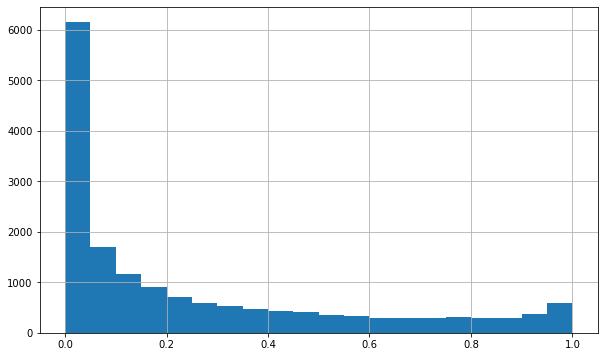

In [209]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))
plt.hist(d_arr[:, 0], 20)
plt.grid()
plt.show()

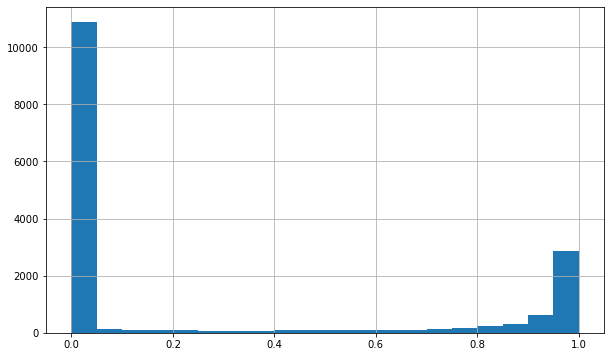

In [166]:
plt.figure(figsize=(10,6))
plt.hist(d_arr[:, 1], 20)
plt.grid()
plt.show()

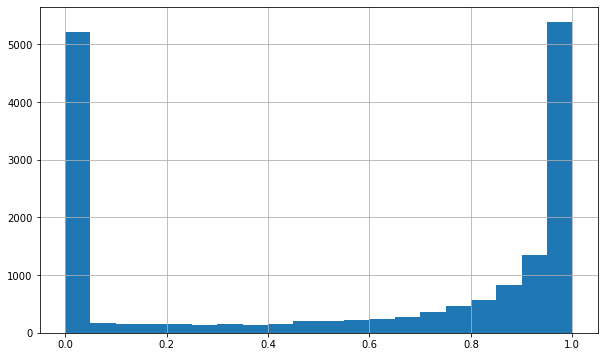

In [167]:
plt.figure(figsize=(10,6))
plt.hist(d_arr[:, 2], 20)
plt.grid()
plt.show()

In [5]:
import pandas as pd

csv_dir = '/media/ldy/e5a10f4e-18fd-4656-80d8-055bc4078655/OSCC-Tile/5x_224/'
csv_path = csv_dir + 'train_224.csv'

df = pd.read_csv(csv_path)
df['row'] = None
df['col'] = None

rows = []
cols = []
for i in df.index:
    img = df['image_id'][i].split('_')
    rows.append(int(img[2]))
    cols.append(int(img[3]))
df['row'] = rows
df['col'] = cols

In [6]:
df

,Unnamed: 0,image_id,slide_id,ratio,new_ratio,target,row,col
0,0,_20190403080952_0_27_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,0,27
1,1,_20190403080952_0_28_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,0,28
2,2,_20190403080952_1_20_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,20
3,3,_20190403080952_1_21_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,21
4,4,_20190403080952_1_22_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,22
5,5,_20190403080952_1_23_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,23
6,6,_20190403080952_1_24_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,24
7,7,_20190403080952_1_25_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,25
8,8,_20190403080952_1_26_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,26
9,9,_20190403080952_1_27_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,27


In [7]:
df.to_csv(csv_path)

In [8]:
df.columns

Index(['Unnamed: 0', 'image_id', 'slide_id', 'ratio', 'new_ratio', 'target',
       'row', 'col'],
      dtype='object')

In [9]:
res = pd.DataFrame(columns=df.columns)

In [24]:
res = res.append(df.iloc[2, :])
# res.append(df.iloc[5], ignore_index=True)

In [25]:
df.iloc[2]

Unnamed: 0                        2
image_id      _20190403080952_1_20_
slide_id            _20190403080952
ratio               (1.0, 0.0, 0.0)
new_ratio           (1.0, 0.0, 0.0)
target                            1
row                               1
col                              20
Name: 2, dtype: object

In [26]:
res

,Unnamed: 0,image_id,slide_id,ratio,new_ratio,target,row,col
2,2,_20190403080952_1_20_,_20190403080952,"(1.0, 0.0, 0.0)","(1.0, 0.0, 0.0)",1,1,20
